In [1]:
import sys, os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import raw_data_path, direcslist, load_image, ImageQuant2
%matplotlib widget

### Data paths

In [2]:
basepath = raw_data_path + '/Imaging/mlc4'
paths = direcslist(basepath, 1)
print(len(paths))

17


### Extract data from paths

In [3]:
dates = []
lines = []
embryo_ids = []
for p in paths:
    code = p.strip('/').split('/')[-2]
    dates.append(code.split('_')[0])
    lines.append(code.split('_')[1])
    # embryo_id = int(os.path.getmtime(glob.glob(p + '/*488 SP 535-50*')[0]))
    # np.savetxt(p + '/EmbryoID.txt', [embryo_id], fmt='%i')
    embryo_ids.append(str(np.loadtxt(p + '/EmbryoID.txt').astype(int)))
print(len(set(embryo_ids)))
df = pd.DataFrame({'Path': paths, 'EmbryoID': embryo_ids, 'Line': lines, 'Date': dates})
df = df[df.Line.isin(['lp637', 'nwg240', 'nwg338', 'nwg376'])]
df['Path'] = df['Path'].apply(lambda x: x[len(raw_data_path):])
df.to_csv('../../data/mlc4_embryos.csv')
df

17


Path    EmbryoID    Line  \
0   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651686192  nwg376   
1   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651689529  nwg376   
2   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651690158  nwg376   
3   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651691673  nwg376   
4   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651692142  nwg376   
5   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651762677   lp637   
6   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651764081   lp637   
7   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651763515   lp637   
8   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765815   lp637   
9   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765978   lp637   
10  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651766092   lp637   
11  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768045   lp637   
12  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768497   lp637   
13  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651758810  nwg376   
14  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651759099  nwg376   
15  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761419  nwg376   
16  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761965  nwg376   

      Date  
0   220504  
1   220504  
2   220504  
3   220504  
4   220504  
5   220505  
6   220505  
7   220505  
8   220505  
9   220505  
10  220505  
11  220505  
12  220505  
13  220505  
14  220505  
15  220505  
16  220505

### Segment

In [4]:
# results = []
# for index, row in df.iterrows():
#     print(row.Path)
    
#     # Import movie
#     img = load_image(row.Path + '/af_corrected.tif')
#     roi = np.loadtxt(row.Path + '/ROI_fit_anaphase.txt')
    
#     # Run quantification
#     iq = ImageQuant2(img=img, roi=roi)
#     iq.segment()
    
#     # Save ROIs
#     for i, r in enumerate(iq.roi):
#         np.savetxt(row.Path + '/ROI_fit_%s.txt' % i, r)

### Import quantification model

In [5]:
membg = np.loadtxt('../../data/calibration_mem6.txt')
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
calibration_factor = np.loadtxt('../../data/calibration_constants.txt')[6]
print(calibration_factor)

3.105838399548696


### Loop through embryos and quantify

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<15:23,  1.08it/s]

  1%|█▎                                                                                                                                              | 9/1000 [00:01<01:25, 11.62it/s]

  2%|██▌                                                                                                                                            | 18/1000 [00:01<00:41, 23.74it/s]

  3%|███▊                                                                                                                                           | 27/1000 [00:01<00:27, 35.18it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:01<00:21, 45.49it/s]

  4%|██████▍                                                                                                                                        | 45/1000 [00:01<00:17, 53.98it/s]

  5%|███████▋                                                                                                                                       | 54/1000 [00:01<00:15, 61.30it/s]

  6%|████████▊                                                                                                                                      | 62/1000 [00:01<00:14, 65.27it/s]

  7%|██████████                                                                                                                                     | 70/1000 [00:01<00:13, 67.69it/s]

  8%|███████████▏                                                                                                                                   | 78/1000 [00:01<00:13, 70.90it/s]

  9%|████████████▍                                                                                                                                  | 87/1000 [00:01<00:12, 75.47it/s]

 10%|█████████████▋                                                                                                                                 | 96/1000 [00:02<00:11, 78.75it/s]

 10%|██████████████▉                                                                                                                               | 105/1000 [00:02<00:11, 80.77it/s]

 11%|████████████████▏                                                                                                                             | 114/1000 [00:02<00:10, 81.95it/s]

 12%|█████████████████▍                                                                                                                            | 123/1000 [00:02<00:10, 83.71it/s]

 13%|██████████████████▋                                                                                                                           | 132/1000 [00:02<00:10, 84.65it/s]

 14%|████████████████████                                                                                                                          | 141/1000 [00:02<00:10, 84.67it/s]

 15%|█████████████████████▎                                                                                                                        | 150/1000 [00:02<00:10, 84.90it/s]

 16%|██████████████████████▌                                                                                                                       | 159/1000 [00:02<00:09, 84.28it/s]

 17%|███████████████████████▊                                                                                                                      | 168/1000 [00:02<00:09, 84.99it/s]

 18%|█████████████████████████▏                                                                                                                    | 177/1000 [00:03<00:09, 85.25it/s]

 19%|██████████████████████████▍                                                                                                                   | 186/1000 [00:03<00:09, 85.37it/s]

 20%|███████████████████████████▋                                                                                                                  | 195/1000 [00:03<00:09, 85.39it/s]

 20%|████████████████████████████▉                                                                                                                 | 204/1000 [00:03<00:09, 85.70it/s]

 21%|██████████████████████████████▏                                                                                                               | 213/1000 [00:03<00:09, 85.29it/s]

 22%|███████████████████████████████▌                                                                                                              | 222/1000 [00:03<00:09, 83.45it/s]

 23%|████████████████████████████████▊                                                                                                             | 231/1000 [00:03<00:09, 82.77it/s]

 24%|██████████████████████████████████                                                                                                            | 240/1000 [00:03<00:09, 83.09it/s]

 25%|███████████████████████████████████▎                                                                                                          | 249/1000 [00:03<00:09, 83.03it/s]

 26%|████████████████████████████████████▋                                                                                                         | 258/1000 [00:04<00:08, 82.93it/s]

 27%|█████████████████████████████████████▉                                                                                                        | 267/1000 [00:04<00:09, 79.05it/s]

 28%|███████████████████████████████████████                                                                                                       | 275/1000 [00:04<00:09, 78.52it/s]

 28%|████████████████████████████████████████▎                                                                                                     | 284/1000 [00:04<00:08, 79.80it/s]

 29%|█████████████████████████████████████████▌                                                                                                    | 293/1000 [00:04<00:08, 80.98it/s]

 30%|██████████████████████████████████████████▉                                                                                                   | 302/1000 [00:04<00:08, 82.02it/s]

 31%|████████████████████████████████████████████▏                                                                                                 | 311/1000 [00:04<00:08, 82.16it/s]

 32%|█████████████████████████████████████████████▍                                                                                                | 320/1000 [00:04<00:08, 80.10it/s]

 33%|██████████████████████████████████████████████▋                                                                                               | 329/1000 [00:04<00:08, 77.77it/s]

 34%|███████████████████████████████████████████████▊                                                                                              | 337/1000 [00:05<00:08, 77.21it/s]

 34%|████████████████████████████████████████████████▉                                                                                             | 345/1000 [00:05<00:08, 77.15it/s]

 35%|██████████████████████████████████████████████████▎                                                                                           | 354/1000 [00:05<00:08, 80.45it/s]

 36%|███████████████████████████████████████████████████▌                                                                                          | 363/1000 [00:05<00:07, 82.71it/s]

 37%|████████████████████████████████████████████████████▊                                                                                         | 372/1000 [00:05<00:07, 84.45it/s]

 38%|██████████████████████████████████████████████████████                                                                                        | 381/1000 [00:05<00:07, 84.63it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                      | 390/1000 [00:05<00:07, 84.67it/s]

 40%|████████████████████████████████████████████████████████▋                                                                                     | 399/1000 [00:05<00:07, 83.33it/s]

 41%|█████████████████████████████████████████████████████████▉                                                                                    | 408/1000 [00:05<00:07, 79.85it/s]

 42%|███████████████████████████████████████████████████████████▏                                                                                  | 417/1000 [00:06<00:07, 77.61it/s]

 42%|████████████████████████████████████████████████████████████▎                                                                                 | 425/1000 [00:06<00:07, 77.59it/s]

 43%|█████████████████████████████████████████████████████████████▋                                                                                | 434/1000 [00:06<00:07, 78.74it/s]

 44%|██████████████████████████████████████████████████████████████▊                                                                               | 442/1000 [00:06<00:07, 78.63it/s]

 45%|████████████████████████████████████████████████████████████████                                                                              | 451/1000 [00:06<00:06, 79.94it/s]

 46%|█████████████████████████████████████████████████████████████████▎                                                                            | 460/1000 [00:06<00:06, 80.64it/s]

 47%|██████████████████████████████████████████████████████████████████▌                                                                           | 469/1000 [00:06<00:06, 81.16it/s]

 48%|███████████████████████████████████████████████████████████████████▉                                                                          | 478/1000 [00:06<00:06, 79.09it/s]

 49%|█████████████████████████████████████████████████████████████████████▏                                                                        | 487/1000 [00:06<00:06, 79.87it/s]

 50%|██████████████████████████████████████████████████████████████████████▍                                                                       | 496/1000 [00:06<00:06, 80.99it/s]

 50%|███████████████████████████████████████████████████████████████████████▋                                                                      | 505/1000 [00:07<00:06, 81.06it/s]

 51%|████████████████████████████████████████████████████████████████████████▉                                                                     | 514/1000 [00:07<00:05, 81.33it/s]

 52%|██████████████████████████████████████████████████████████████████████████▎                                                                   | 523/1000 [00:07<00:05, 80.73it/s]

 53%|███████████████████████████████████████████████████████████████████████████▌                                                                  | 532/1000 [00:07<00:05, 81.23it/s]

 54%|████████████████████████████████████████████████████████████████████████████▊                                                                 | 541/1000 [00:07<00:05, 79.95it/s]

 55%|██████████████████████████████████████████████████████████████████████████████                                                                | 550/1000 [00:07<00:05, 81.08it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▍                                                              | 559/1000 [00:07<00:05, 81.58it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▋                                                             | 568/1000 [00:07<00:05, 81.34it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▉                                                            | 577/1000 [00:07<00:05, 81.18it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▏                                                          | 586/1000 [00:08<00:05, 81.52it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▍                                                         | 595/1000 [00:08<00:04, 82.24it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▊                                                        | 604/1000 [00:08<00:04, 82.52it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████████                                                       | 613/1000 [00:08<00:04, 81.51it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 622/1000 [00:08<00:04, 80.92it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 631/1000 [00:08<00:04, 81.60it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 640/1000 [00:08<00:04, 82.96it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 649/1000 [00:08<00:04, 81.79it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 658/1000 [00:08<00:04, 82.54it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 667/1000 [00:09<00:04, 82.71it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 676/1000 [00:09<00:03, 82.40it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 685/1000 [00:09<00:03, 80.68it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 694/1000 [00:09<00:03, 79.33it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 703/1000 [00:09<00:03, 80.37it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 712/1000 [00:09<00:03, 81.31it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 722/1000 [00:09<00:03, 84.42it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 731/1000 [00:09<00:03, 85.00it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 741/1000 [00:09<00:02, 87.49it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 750/1000 [00:10<00:02, 87.77it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 760/1000 [00:10<00:02, 89.25it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 769/1000 [00:10<00:02, 87.42it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 778/1000 [00:10<00:02, 86.47it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 787/1000 [00:10<00:02, 86.25it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 796/1000 [00:10<00:02, 85.99it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 805/1000 [00:10<00:02, 86.10it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 814/1000 [00:10<00:02, 84.42it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 823/1000 [00:10<00:02, 83.80it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 832/1000 [00:11<00:02, 81.63it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 841/1000 [00:11<00:01, 83.48it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 850/1000 [00:11<00:01, 84.50it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 859/1000 [00:11<00:01, 84.86it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 868/1000 [00:11<00:01, 83.85it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 877/1000 [00:11<00:01, 83.54it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 886/1000 [00:11<00:01, 84.60it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 895/1000 [00:11<00:01, 85.16it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 904/1000 [00:11<00:01, 85.26it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 913/1000 [00:11<00:01, 85.32it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 922/1000 [00:12<00:00, 83.25it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 931/1000 [00:12<00:00, 78.94it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 939/1000 [00:12<00:00, 75.20it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 947/1000 [00:12<00:00, 73.03it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 955/1000 [00:12<00:00, 71.33it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 963/1000 [00:12<00:00, 71.77it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 971/1000 [00:12<00:00, 72.50it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:12<00:00, 74.04it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:13<00:00, 75.00it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:13<00:00, 77.03it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.92it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<13:25,  1.24it/s]

  1%|█▋                                                                                                                                             | 12/1000 [00:00<00:56, 17.36it/s]

  2%|███▌                                                                                                                                           | 25/1000 [00:01<00:26, 36.74it/s]

  4%|█████▎                                                                                                                                         | 37/1000 [00:01<00:18, 52.64it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:01<00:14, 65.15it/s]

  6%|████████▍                                                                                                                                      | 59/1000 [00:01<00:12, 74.24it/s]

  7%|██████████                                                                                                                                     | 70/1000 [00:01<00:11, 81.61it/s]

  8%|███████████▌                                                                                                                                   | 81/1000 [00:01<00:11, 80.72it/s]

  9%|█████████████▏                                                                                                                                 | 92/1000 [00:01<00:10, 87.89it/s]

 10%|██████████████▉                                                                                                                               | 105/1000 [00:01<00:09, 98.60it/s]

 12%|████████████████▋                                                                                                                            | 118/1000 [00:01<00:08, 106.58it/s]

 13%|██████████████████▍                                                                                                                          | 131/1000 [00:01<00:07, 111.33it/s]

 14%|████████████████████▍                                                                                                                        | 145/1000 [00:02<00:07, 117.70it/s]

 16%|██████████████████████▎                                                                                                                      | 158/1000 [00:02<00:07, 116.89it/s]

 17%|███████████████████████▉                                                                                                                     | 170/1000 [00:02<00:07, 116.77it/s]

 18%|█████████████████████████▋                                                                                                                   | 182/1000 [00:02<00:07, 111.88it/s]

 19%|███████████████████████████▎                                                                                                                 | 194/1000 [00:02<00:08, 100.57it/s]

 20%|█████████████████████████████                                                                                                                 | 205/1000 [00:02<00:08, 91.90it/s]

 22%|██████████████████████████████▌                                                                                                               | 215/1000 [00:02<00:08, 89.68it/s]

 22%|███████████████████████████████▉                                                                                                              | 225/1000 [00:03<00:09, 79.81it/s]

 23%|█████████████████████████████████▏                                                                                                            | 234/1000 [00:03<00:10, 75.45it/s]

 24%|██████████████████████████████████▎                                                                                                           | 242/1000 [00:03<00:10, 70.59it/s]

 25%|███████████████████████████████████▌                                                                                                          | 250/1000 [00:03<00:11, 67.11it/s]

 26%|████████████████████████████████████▍                                                                                                         | 257/1000 [00:03<00:11, 63.22it/s]

 26%|█████████████████████████████████████▍                                                                                                        | 264/1000 [00:03<00:12, 60.30it/s]

 27%|██████████████████████████████████████▉                                                                                                       | 274/1000 [00:03<00:10, 69.18it/s]

 28%|████████████████████████████████████████▎                                                                                                     | 284/1000 [00:03<00:09, 76.14it/s]

 29%|█████████████████████████████████████████▌                                                                                                    | 293/1000 [00:03<00:08, 78.96it/s]

 30%|███████████████████████████████████████████                                                                                                   | 303/1000 [00:04<00:08, 80.53it/s]

 31%|████████████████████████████████████████████▎                                                                                                 | 312/1000 [00:04<00:08, 81.18it/s]

 32%|█████████████████████████████████████████████▋                                                                                                | 322/1000 [00:04<00:07, 84.85it/s]

 33%|███████████████████████████████████████████████▏                                                                                              | 332/1000 [00:04<00:07, 88.14it/s]

 34%|████████████████████████████████████████████████▌                                                                                             | 342/1000 [00:04<00:07, 89.49it/s]

 35%|█████████████████████████████████████████████████▉                                                                                            | 352/1000 [00:04<00:07, 87.62it/s]

 36%|███████████████████████████████████████████████████▎                                                                                          | 361/1000 [00:04<00:07, 87.03it/s]

 37%|████████████████████████████████████████████████████▋                                                                                         | 371/1000 [00:04<00:07, 88.63it/s]

 38%|█████████████████████████████████████████████████████▉                                                                                        | 380/1000 [00:05<00:09, 68.07it/s]

 39%|███████████████████████████████████████████████████████                                                                                       | 388/1000 [00:05<00:09, 64.96it/s]

 40%|████████████████████████████████████████████████████████                                                                                      | 395/1000 [00:05<00:09, 65.49it/s]

 40%|█████████████████████████████████████████████████████████                                                                                     | 402/1000 [00:05<00:09, 63.74it/s]

 41%|██████████████████████████████████████████████████████████▌                                                                                   | 412/1000 [00:05<00:08, 71.48it/s]

 42%|████████████████████████████████████████████████████████████                                                                                  | 423/1000 [00:05<00:07, 81.40it/s]

 44%|█████████████████████████████████████████████████████████████▉                                                                                | 436/1000 [00:05<00:06, 92.99it/s]

 45%|███████████████████████████████████████████████████████████████▎                                                                             | 449/1000 [00:05<00:05, 101.37it/s]

 46%|████████████████████████████████████████████████████████████████▊                                                                            | 460/1000 [00:05<00:05, 103.62it/s]

 47%|██████████████████████████████████████████████████████████████████▌                                                                          | 472/1000 [00:06<00:04, 106.47it/s]

 48%|████████████████████████████████████████████████████████████████████                                                                         | 483/1000 [00:06<00:04, 105.70it/s]

 50%|█████████████████████████████████████████████████████████████████████▊                                                                       | 495/1000 [00:06<00:04, 109.06it/s]

 51%|███████████████████████████████████████████████████████████████████████▍                                                                     | 507/1000 [00:06<00:04, 111.40it/s]

 52%|█████████████████████████████████████████████████████████████████████████▏                                                                   | 519/1000 [00:06<00:04, 113.15it/s]

 53%|██████████████████████████████████████████████████████████████████████████▊                                                                  | 531/1000 [00:06<00:04, 114.77it/s]

 54%|████████████████████████████████████████████████████████████████████████████▌                                                                | 543/1000 [00:06<00:04, 113.93it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▎                                                              | 555/1000 [00:06<00:03, 114.75it/s]

 57%|███████████████████████████████████████████████████████████████████████████████▉                                                             | 567/1000 [00:06<00:03, 115.34it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▊                                                           | 580/1000 [00:07<00:03, 117.09it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▌                                                         | 593/1000 [00:07<00:03, 117.92it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                       | 606/1000 [00:07<00:03, 118.52it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▎                                                     | 619/1000 [00:07<00:03, 119.61it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████                                                    | 632/1000 [00:07<00:03, 120.65it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 645/1000 [00:07<00:02, 121.39it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 658/1000 [00:07<00:02, 121.79it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 671/1000 [00:07<00:02, 121.39it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 684/1000 [00:07<00:02, 119.26it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 696/1000 [00:07<00:02, 118.13it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 708/1000 [00:08<00:02, 117.44it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 720/1000 [00:08<00:02, 115.48it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 733/1000 [00:08<00:02, 117.54it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 746/1000 [00:08<00:02, 120.12it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 759/1000 [00:08<00:01, 122.27it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 772/1000 [00:08<00:01, 123.55it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 785/1000 [00:08<00:01, 123.41it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 798/1000 [00:08<00:01, 121.70it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 811/1000 [00:08<00:01, 119.67it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 824/1000 [00:09<00:01, 120.98it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 837/1000 [00:09<00:01, 121.86it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 850/1000 [00:09<00:01, 123.13it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 863/1000 [00:09<00:01, 124.36it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 876/1000 [00:09<00:00, 124.21it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 890/1000 [00:09<00:00, 125.82it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 903/1000 [00:09<00:00, 126.90it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 916/1000 [00:09<00:00, 127.35it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 929/1000 [00:09<00:00, 127.89it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 942/1000 [00:09<00:00, 127.45it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 956/1000 [00:10<00:00, 128.03it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 969/1000 [00:10<00:00, 127.60it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 982/1000 [00:10<00:00, 127.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 995/1000 [00:10<00:00, 127.69it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.04it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<12:30,  1.33it/s]

  2%|██▌                                                                                                                                            | 18/1000 [00:00<00:34, 28.25it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:00<00:17, 56.07it/s]

  5%|███████▋                                                                                                                                       | 54/1000 [00:01<00:11, 81.51it/s]

  7%|██████████▏                                                                                                                                   | 72/1000 [00:01<00:09, 103.06it/s]

  9%|████████████▋                                                                                                                                 | 89/1000 [00:01<00:07, 117.25it/s]

 10%|██████████████▊                                                                                                                              | 105/1000 [00:01<00:07, 123.41it/s]

 12%|█████████████████                                                                                                                            | 121/1000 [00:01<00:06, 126.63it/s]

 14%|███████████████████▍                                                                                                                         | 138/1000 [00:01<00:06, 136.87it/s]

 15%|█████████████████████▋                                                                                                                       | 154/1000 [00:01<00:05, 142.28it/s]

 17%|███████████████████████▉                                                                                                                     | 170/1000 [00:01<00:05, 145.17it/s]

 19%|██████████████████████████▎                                                                                                                  | 187/1000 [00:01<00:05, 150.43it/s]

 20%|████████████████████████████▌                                                                                                                | 203/1000 [00:02<00:05, 152.82it/s]

 22%|███████████████████████████████                                                                                                              | 220/1000 [00:02<00:05, 155.64it/s]

 24%|█████████████████████████████████▎                                                                                                           | 236/1000 [00:02<00:04, 156.45it/s]

 25%|███████████████████████████████████▌                                                                                                         | 252/1000 [00:02<00:05, 148.30it/s]

 27%|█████████████████████████████████████▊                                                                                                       | 268/1000 [00:02<00:05, 135.66it/s]

 28%|███████████████████████████████████████▊                                                                                                     | 282/1000 [00:02<00:05, 134.27it/s]

 30%|██████████████████████████████████████████▏                                                                                                  | 299/1000 [00:02<00:04, 143.08it/s]

 32%|████████████████████████████████████████████▌                                                                                                | 316/1000 [00:02<00:04, 148.58it/s]

 33%|██████████████████████████████████████████████▊                                                                                              | 332/1000 [00:02<00:04, 151.72it/s]

 35%|█████████████████████████████████████████████████                                                                                            | 348/1000 [00:03<00:04, 152.86it/s]

 36%|███████████████████████████████████████████████████▍                                                                                         | 365/1000 [00:03<00:04, 156.00it/s]

 38%|█████████████████████████████████████████████████████▊                                                                                       | 382/1000 [00:03<00:03, 157.22it/s]

 40%|████████████████████████████████████████████████████████                                                                                     | 398/1000 [00:03<00:03, 156.28it/s]

 42%|██████████████████████████████████████████████████████████▋                                                                                  | 416/1000 [00:03<00:03, 161.61it/s]

 43%|█████████████████████████████████████████████████████████████▏                                                                               | 434/1000 [00:03<00:03, 166.06it/s]

 45%|███████████████████████████████████████████████████████████████▋                                                                             | 452/1000 [00:03<00:03, 168.28it/s]

 47%|██████████████████████████████████████████████████████████████████▎                                                                          | 470/1000 [00:03<00:03, 171.45it/s]

 49%|████████████████████████████████████████████████████████████████████▊                                                                        | 488/1000 [00:03<00:02, 171.59it/s]

 51%|███████████████████████████████████████████████████████████████████████▎                                                                     | 506/1000 [00:03<00:02, 171.39it/s]

 52%|█████████████████████████████████████████████████████████████████████████▉                                                                   | 524/1000 [00:04<00:02, 173.27it/s]

 54%|████████████████████████████████████████████████████████████████████████████▍                                                                | 542/1000 [00:04<00:02, 172.69it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▉                                                              | 560/1000 [00:04<00:02, 168.92it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▎                                                           | 577/1000 [00:04<00:02, 165.79it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                         | 594/1000 [00:04<00:02, 166.95it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▏                                                      | 611/1000 [00:04<00:02, 165.68it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 628/1000 [00:04<00:02, 166.18it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 645/1000 [00:04<00:02, 164.57it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 662/1000 [00:04<00:02, 163.17it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 679/1000 [00:04<00:01, 163.20it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 696/1000 [00:05<00:01, 161.08it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 713/1000 [00:05<00:01, 159.43it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 730/1000 [00:05<00:01, 160.88it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 747/1000 [00:05<00:01, 161.59it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 764/1000 [00:05<00:01, 162.80it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 781/1000 [00:05<00:01, 161.78it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 798/1000 [00:05<00:01, 161.95it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 815/1000 [00:05<00:01, 163.05it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 832/1000 [00:05<00:01, 164.62it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 850/1000 [00:06<00:00, 168.60it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 867/1000 [00:06<00:00, 167.70it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 885/1000 [00:06<00:00, 169.33it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 903/1000 [00:06<00:00, 170.44it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 921/1000 [00:06<00:00, 172.78it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 939/1000 [00:06<00:00, 173.40it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 957/1000 [00:06<00:00, 174.18it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 975/1000 [00:06<00:00, 175.27it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:06<00:00, 175.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.15it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:13,  1.80it/s]

  2%|██▎                                                                                                                                            | 16/1000 [00:00<00:30, 32.08it/s]

  3%|████▍                                                                                                                                          | 31/1000 [00:00<00:16, 58.63it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:00<00:11, 85.22it/s]

  6%|█████████                                                                                                                                     | 64/1000 [00:00<00:08, 104.34it/s]

  8%|███████████▎                                                                                                                                  | 80/1000 [00:01<00:07, 117.79it/s]

 10%|█████████████▋                                                                                                                                | 96/1000 [00:01<00:07, 127.43it/s]

 11%|███████████████▊                                                                                                                             | 112/1000 [00:01<00:06, 134.86it/s]

 13%|██████████████████▏                                                                                                                          | 129/1000 [00:01<00:06, 143.30it/s]

 14%|████████████████████▍                                                                                                                        | 145/1000 [00:01<00:05, 147.14it/s]

 16%|██████████████████████▋                                                                                                                      | 161/1000 [00:01<00:05, 146.64it/s]

 18%|████████████████████████▉                                                                                                                    | 177/1000 [00:01<00:05, 145.92it/s]

 19%|███████████████████████████▏                                                                                                                 | 193/1000 [00:01<00:05, 147.67it/s]

 21%|█████████████████████████████▍                                                                                                               | 209/1000 [00:01<00:05, 149.41it/s]

 22%|███████████████████████████████▋                                                                                                             | 225/1000 [00:02<00:05, 150.51it/s]

 24%|█████████████████████████████████▉                                                                                                           | 241/1000 [00:02<00:04, 152.07it/s]

 26%|████████████████████████████████████▏                                                                                                        | 257/1000 [00:02<00:04, 152.97it/s]

 27%|██████████████████████████████████████▍                                                                                                      | 273/1000 [00:02<00:04, 153.18it/s]

 29%|█████████████████████████████████████████                                                                                                    | 291/1000 [00:02<00:04, 158.76it/s]

 31%|███████████████████████████████████████████▎                                                                                                 | 307/1000 [00:02<00:04, 156.81it/s]

 32%|█████████████████████████████████████████████▌                                                                                               | 323/1000 [00:02<00:04, 157.04it/s]

 34%|███████████████████████████████████████████████▊                                                                                             | 339/1000 [00:02<00:04, 155.43it/s]

 36%|██████████████████████████████████████████████████                                                                                           | 355/1000 [00:02<00:04, 153.28it/s]

 37%|████████████████████████████████████████████████████▎                                                                                        | 371/1000 [00:02<00:04, 152.68it/s]

 39%|██████████████████████████████████████████████████████▌                                                                                      | 387/1000 [00:03<00:04, 146.05it/s]

 40%|████████████████████████████████████████████████████████▊                                                                                    | 403/1000 [00:03<00:04, 148.72it/s]

 42%|███████████████████████████████████████████████████████████▏                                                                                 | 420/1000 [00:03<00:03, 153.40it/s]

 44%|█████████████████████████████████████████████████████████████▍                                                                               | 436/1000 [00:03<00:03, 152.84it/s]

 45%|███████████████████████████████████████████████████████████████▋                                                                             | 452/1000 [00:03<00:03, 150.83it/s]

 47%|█████████████████████████████████████████████████████████████████▉                                                                           | 468/1000 [00:03<00:03, 149.12it/s]

 48%|████████████████████████████████████████████████████████████████████▏                                                                        | 484/1000 [00:03<00:03, 151.60it/s]

 50%|██████████████████████████████████████████████████████████████████████▌                                                                      | 500/1000 [00:03<00:03, 151.57it/s]

 52%|████████████████████████████████████████████████████████████████████████▊                                                                    | 516/1000 [00:03<00:03, 151.93it/s]

 53%|███████████████████████████████████████████████████████████████████████████▎                                                                 | 534/1000 [00:04<00:02, 159.59it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▋                                                               | 551/1000 [00:04<00:02, 160.51it/s]

 57%|████████████████████████████████████████████████████████████████████████████████                                                             | 568/1000 [00:04<00:02, 159.24it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▎                                                          | 584/1000 [00:04<00:02, 156.95it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▉                                                        | 602/1000 [00:04<00:02, 161.31it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▍                                                     | 620/1000 [00:04<00:02, 163.67it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 637/1000 [00:04<00:02, 163.26it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 654/1000 [00:04<00:02, 160.80it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 671/1000 [00:04<00:02, 160.89it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████                                            | 688/1000 [00:04<00:01, 162.17it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 705/1000 [00:05<00:01, 163.89it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 723/1000 [00:05<00:01, 165.71it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 740/1000 [00:05<00:01, 166.58it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 757/1000 [00:05<00:01, 159.09it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 773/1000 [00:05<00:01, 137.80it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 788/1000 [00:05<00:01, 123.62it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 803/1000 [00:05<00:01, 129.38it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 817/1000 [00:05<00:01, 120.01it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 830/1000 [00:06<00:01, 113.72it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 842/1000 [00:06<00:01, 109.59it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 854/1000 [00:06<00:01, 104.37it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 865/1000 [00:06<00:01, 105.52it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 876/1000 [00:06<00:01, 106.39it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 890/1000 [00:06<00:00, 115.54it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 906/1000 [00:06<00:00, 127.24it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 921/1000 [00:06<00:00, 132.65it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 935/1000 [00:06<00:00, 125.78it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 948/1000 [00:07<00:00, 123.31it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 961/1000 [00:07<00:00, 121.45it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 974/1000 [00:07<00:00, 119.27it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:07<00:00, 121.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 118.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.01it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<12:48,  1.30it/s]

  2%|██▏                                                                                                                                            | 15/1000 [00:00<00:42, 23.02it/s]

  3%|████▏                                                                                                                                          | 29/1000 [00:00<00:21, 44.18it/s]

  4%|██████▏                                                                                                                                        | 43/1000 [00:01<00:15, 63.24it/s]

  6%|████████▏                                                                                                                                      | 57/1000 [00:01<00:11, 80.44it/s]

  7%|██████████▏                                                                                                                                    | 71/1000 [00:01<00:09, 94.35it/s]

  8%|███████████▉                                                                                                                                  | 84/1000 [00:01<00:08, 102.63it/s]

 10%|█████████████▉                                                                                                                                | 98/1000 [00:01<00:08, 110.80it/s]

 11%|███████████████▊                                                                                                                             | 112/1000 [00:01<00:07, 118.30it/s]

 13%|█████████████████▊                                                                                                                           | 126/1000 [00:01<00:07, 122.18it/s]

 14%|███████████████████▋                                                                                                                         | 140/1000 [00:01<00:07, 120.87it/s]

 15%|█████████████████████▌                                                                                                                       | 153/1000 [00:01<00:06, 122.07it/s]

 17%|███████████████████████▌                                                                                                                     | 167/1000 [00:02<00:06, 125.97it/s]

 18%|█████████████████████████▌                                                                                                                   | 181/1000 [00:02<00:06, 128.21it/s]

 20%|███████████████████████████▍                                                                                                                 | 195/1000 [00:02<00:06, 130.46it/s]

 21%|█████████████████████████████▍                                                                                                               | 209/1000 [00:02<00:06, 130.88it/s]

 22%|███████████████████████████████▍                                                                                                             | 223/1000 [00:02<00:06, 124.76it/s]

 24%|█████████████████████████████████▎                                                                                                           | 236/1000 [00:02<00:06, 122.07it/s]

 25%|███████████████████████████████████                                                                                                          | 249/1000 [00:02<00:06, 120.58it/s]

 26%|████████████████████████████████████▉                                                                                                        | 262/1000 [00:02<00:06, 121.32it/s]

 28%|██████████████████████████████████████▊                                                                                                      | 275/1000 [00:02<00:05, 121.57it/s]

 29%|████████████████████████████████████████▌                                                                                                    | 288/1000 [00:03<00:05, 120.85it/s]

 30%|██████████████████████████████████████████▍                                                                                                  | 301/1000 [00:03<00:05, 120.15it/s]

 31%|████████████████████████████████████████████▎                                                                                                | 314/1000 [00:03<00:05, 120.47it/s]

 33%|██████████████████████████████████████████████▏                                                                                              | 328/1000 [00:03<00:05, 123.15it/s]

 34%|████████████████████████████████████████████████                                                                                             | 341/1000 [00:03<00:05, 122.07it/s]

 36%|██████████████████████████████████████████████████                                                                                           | 355/1000 [00:03<00:05, 124.79it/s]

 37%|███████████████████████████████████████████████████▉                                                                                         | 368/1000 [00:03<00:05, 126.00it/s]

 38%|█████████████████████████████████████████████████████▋                                                                                       | 381/1000 [00:03<00:05, 120.20it/s]

 39%|███████████████████████████████████████████████████████▌                                                                                     | 394/1000 [00:03<00:05, 120.68it/s]

 41%|█████████████████████████████████████████████████████████▍                                                                                   | 407/1000 [00:03<00:04, 121.72it/s]

 42%|███████████████████████████████████████████████████████████▎                                                                                 | 421/1000 [00:04<00:04, 124.82it/s]

 44%|█████████████████████████████████████████████████████████████▍                                                                               | 436/1000 [00:04<00:04, 130.03it/s]

 45%|███████████████████████████████████████████████████████████████▌                                                                             | 451/1000 [00:04<00:04, 132.90it/s]

 46%|█████████████████████████████████████████████████████████████████▌                                                                           | 465/1000 [00:04<00:04, 131.90it/s]

 48%|███████████████████████████████████████████████████████████████████▌                                                                         | 479/1000 [00:04<00:03, 131.98it/s]

 49%|█████████████████████████████████████████████████████████████████████▋                                                                       | 494/1000 [00:04<00:03, 136.30it/s]

 51%|███████████████████████████████████████████████████████████████████████▋                                                                     | 508/1000 [00:04<00:03, 134.55it/s]

 52%|█████████████████████████████████████████████████████████████████████████▌                                                                   | 522/1000 [00:04<00:03, 132.70it/s]

 54%|███████████████████████████████████████████████████████████████████████████▌                                                                 | 536/1000 [00:04<00:03, 131.30it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▌                                                               | 550/1000 [00:05<00:03, 130.24it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▌                                                             | 564/1000 [00:05<00:03, 129.13it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▍                                                           | 578/1000 [00:05<00:03, 129.33it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▎                                                         | 591/1000 [00:05<00:03, 127.55it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                       | 606/1000 [00:05<00:02, 132.83it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▌                                                     | 621/1000 [00:05<00:02, 135.29it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 636/1000 [00:05<00:02, 138.22it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 650/1000 [00:05<00:02, 138.35it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 664/1000 [00:05<00:02, 136.03it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 678/1000 [00:05<00:02, 135.46it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 692/1000 [00:06<00:02, 133.55it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 706/1000 [00:06<00:02, 133.68it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 720/1000 [00:06<00:02, 132.90it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 734/1000 [00:06<00:02, 131.55it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 748/1000 [00:06<00:01, 131.91it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 762/1000 [00:06<00:01, 132.04it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 776/1000 [00:06<00:01, 131.44it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 790/1000 [00:06<00:01, 130.09it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 804/1000 [00:06<00:01, 128.81it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 818/1000 [00:07<00:01, 129.28it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 831/1000 [00:07<00:01, 129.06it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 845/1000 [00:07<00:01, 129.59it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 858/1000 [00:07<00:01, 129.19it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 872/1000 [00:07<00:00, 130.84it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 886/1000 [00:07<00:00, 131.23it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 900/1000 [00:07<00:00, 131.18it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 914/1000 [00:07<00:00, 132.14it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 928/1000 [00:07<00:00, 130.52it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 942/1000 [00:08<00:00, 130.59it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 956/1000 [00:08<00:00, 129.11it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 969/1000 [00:08<00:00, 109.26it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 981/1000 [00:08<00:00, 100.06it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 992/1000 [00:08<00:00, 95.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.52it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<12:35,  1.32it/s]

  2%|██▏                                                                                                                                            | 15/1000 [00:00<00:42, 23.16it/s]

  3%|████▏                                                                                                                                          | 29/1000 [00:00<00:21, 44.28it/s]

  4%|█████▊                                                                                                                                         | 41/1000 [00:01<00:16, 59.92it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:01<00:12, 73.15it/s]

  7%|█████████▍                                                                                                                                     | 66/1000 [00:01<00:10, 86.71it/s]

  8%|███████████▏                                                                                                                                   | 78/1000 [00:01<00:09, 95.02it/s]

  9%|████████████▊                                                                                                                                 | 90/1000 [00:01<00:08, 101.46it/s]

 10%|██████████████▌                                                                                                                              | 103/1000 [00:01<00:08, 107.78it/s]

 12%|████████████████▎                                                                                                                            | 116/1000 [00:01<00:07, 113.43it/s]

 13%|██████████████████▎                                                                                                                          | 130/1000 [00:01<00:07, 120.44it/s]

 14%|████████████████████▎                                                                                                                        | 144/1000 [00:01<00:06, 124.57it/s]

 16%|██████████████████████▏                                                                                                                      | 157/1000 [00:01<00:06, 125.45it/s]

 17%|███████████████████████▉                                                                                                                     | 170/1000 [00:02<00:06, 126.01it/s]

 18%|█████████████████████████▊                                                                                                                   | 183/1000 [00:02<00:06, 126.58it/s]

 20%|███████████████████████████▋                                                                                                                 | 196/1000 [00:02<00:06, 126.45it/s]

 21%|█████████████████████████████▍                                                                                                               | 209/1000 [00:02<00:06, 125.89it/s]

 22%|███████████████████████████████▎                                                                                                             | 222/1000 [00:02<00:06, 123.94it/s]

 24%|█████████████████████████████████▍                                                                                                           | 237/1000 [00:02<00:05, 129.12it/s]

 25%|███████████████████████████████████▌                                                                                                         | 252/1000 [00:02<00:05, 132.92it/s]

 27%|█████████████████████████████████████▌                                                                                                       | 266/1000 [00:02<00:05, 133.10it/s]

 28%|███████████████████████████████████████▍                                                                                                     | 280/1000 [00:02<00:05, 133.14it/s]

 29%|█████████████████████████████████████████▍                                                                                                   | 294/1000 [00:03<00:05, 134.08it/s]

 31%|███████████████████████████████████████████▍                                                                                                 | 308/1000 [00:03<00:05, 133.98it/s]

 32%|█████████████████████████████████████████████▍                                                                                               | 322/1000 [00:03<00:05, 133.19it/s]

 34%|███████████████████████████████████████████████▍                                                                                             | 336/1000 [00:03<00:05, 131.64it/s]

 35%|█████████████████████████████████████████████████▎                                                                                           | 350/1000 [00:03<00:05, 126.47it/s]

 36%|███████████████████████████████████████████████████▏                                                                                         | 363/1000 [00:03<00:05, 126.90it/s]

 38%|█████████████████████████████████████████████████████                                                                                        | 376/1000 [00:03<00:04, 127.30it/s]

 39%|██████████████████████████████████████████████████████▊                                                                                      | 389/1000 [00:03<00:04, 127.43it/s]

 40%|████████████████████████████████████████████████████████▋                                                                                    | 402/1000 [00:03<00:04, 126.39it/s]

 42%|██████████████████████████████████████████████████████████▌                                                                                  | 415/1000 [00:03<00:04, 125.63it/s]

 43%|████████████████████████████████████████████████████████████▎                                                                                | 428/1000 [00:04<00:04, 123.93it/s]

 44%|██████████████████████████████████████████████████████████████▏                                                                              | 441/1000 [00:04<00:04, 124.81it/s]

 45%|████████████████████████████████████████████████████████████████                                                                             | 454/1000 [00:04<00:04, 124.83it/s]

 47%|█████████████████████████████████████████████████████████████████▊                                                                           | 467/1000 [00:04<00:04, 123.95it/s]

 48%|███████████████████████████████████████████████████████████████████▋                                                                         | 480/1000 [00:04<00:04, 113.19it/s]

 49%|█████████████████████████████████████████████████████████████████████▎                                                                       | 492/1000 [00:04<00:04, 111.21it/s]

 50%|███████████████████████████████████████████████████████████████████████                                                                      | 504/1000 [00:04<00:04, 107.47it/s]

 52%|████████████████████████████████████████████████████████████████████████▉                                                                    | 517/1000 [00:04<00:04, 112.07it/s]

 53%|██████████████████████████████████████████████████████████████████████████▋                                                                  | 530/1000 [00:04<00:04, 116.78it/s]

 54%|████████████████████████████████████████████████████████████████████████████▌                                                                | 543/1000 [00:05<00:03, 119.77it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▍                                                              | 556/1000 [00:05<00:03, 117.30it/s]

 57%|████████████████████████████████████████████████████████████████████████████████                                                             | 568/1000 [00:05<00:03, 117.35it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▊                                                           | 580/1000 [00:05<00:03, 111.57it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▍                                                         | 592/1000 [00:05<00:03, 107.75it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▎                                                       | 605/1000 [00:05<00:03, 113.54it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▏                                                     | 618/1000 [00:05<00:03, 115.67it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 631/1000 [00:05<00:03, 117.51it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 643/1000 [00:06<00:03, 99.02it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 654/1000 [00:06<00:03, 100.57it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 665/1000 [00:06<00:03, 100.54it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 676/1000 [00:06<00:03, 101.44it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 687/1000 [00:06<00:03, 100.99it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████                                           | 698/1000 [00:06<00:03, 81.63it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 711/1000 [00:06<00:03, 91.50it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 724/1000 [00:06<00:02, 100.38it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 736/1000 [00:06<00:02, 104.00it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 748/1000 [00:07<00:02, 107.68it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 760/1000 [00:07<00:02, 108.40it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 773/1000 [00:07<00:02, 113.42it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 787/1000 [00:07<00:01, 119.37it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 802/1000 [00:07<00:01, 125.71it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 816/1000 [00:07<00:01, 126.93it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 829/1000 [00:07<00:01, 124.92it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 843/1000 [00:07<00:01, 127.24it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 857/1000 [00:07<00:01, 127.86it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 870/1000 [00:08<00:01, 119.00it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 883/1000 [00:08<00:01, 108.25it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 895/1000 [00:08<00:01, 98.62it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 906/1000 [00:08<00:01, 93.43it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 916/1000 [00:08<00:00, 94.24it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 926/1000 [00:08<00:00, 94.45it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 936/1000 [00:08<00:00, 93.46it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 946/1000 [00:08<00:00, 89.61it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 956/1000 [00:09<00:00, 83.32it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 968/1000 [00:09<00:00, 90.95it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 981/1000 [00:09<00:00, 99.56it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 994/1000 [00:09<00:00, 105.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.93it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<12:54,  1.29it/s]

  1%|█▏                                                                                                                                              | 8/1000 [00:00<01:23, 11.88it/s]

  2%|██▎                                                                                                                                            | 16/1000 [00:00<00:41, 23.92it/s]

  2%|███▍                                                                                                                                           | 24/1000 [00:01<00:27, 35.16it/s]

  3%|████▍                                                                                                                                          | 31/1000 [00:01<00:22, 42.15it/s]

  4%|█████▍                                                                                                                                         | 38/1000 [00:01<00:20, 48.07it/s]

  4%|██████▍                                                                                                                                        | 45/1000 [00:01<00:18, 51.77it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:01<00:16, 57.50it/s]

  6%|████████▌                                                                                                                                      | 60/1000 [00:01<00:16, 58.14it/s]

  7%|█████████▋                                                                                                                                     | 68/1000 [00:01<00:14, 63.38it/s]

  8%|██████████▋                                                                                                                                    | 75/1000 [00:01<00:14, 63.55it/s]

  8%|███████████▋                                                                                                                                   | 82/1000 [00:01<00:14, 64.20it/s]

  9%|████████████▋                                                                                                                                  | 89/1000 [00:02<00:14, 64.48it/s]

 10%|█████████████▊                                                                                                                                 | 97/1000 [00:02<00:13, 67.14it/s]

 10%|██████████████▉                                                                                                                               | 105/1000 [00:02<00:12, 69.44it/s]

 11%|████████████████                                                                                                                              | 113/1000 [00:02<00:12, 71.45it/s]

 12%|█████████████████▏                                                                                                                            | 121/1000 [00:02<00:14, 62.65it/s]

 13%|██████████████████▏                                                                                                                           | 128/1000 [00:02<00:13, 64.27it/s]

 14%|███████████████████▎                                                                                                                          | 136/1000 [00:02<00:12, 67.53it/s]

 14%|████████████████████▍                                                                                                                         | 144/1000 [00:02<00:12, 70.59it/s]

 15%|█████████████████████▌                                                                                                                        | 152/1000 [00:02<00:11, 71.20it/s]

 16%|██████████████████████▋                                                                                                                       | 160/1000 [00:03<00:11, 72.08it/s]

 17%|███████████████████████▊                                                                                                                      | 168/1000 [00:03<00:11, 72.65it/s]

 18%|████████████████████████▉                                                                                                                     | 176/1000 [00:03<00:11, 69.31it/s]

 18%|██████████████████████████▏                                                                                                                   | 184/1000 [00:03<00:12, 64.59it/s]

 19%|███████████████████████████                                                                                                                   | 191/1000 [00:03<00:12, 63.20it/s]

 20%|████████████████████████████                                                                                                                  | 198/1000 [00:03<00:12, 63.88it/s]

 20%|█████████████████████████████                                                                                                                 | 205/1000 [00:03<00:12, 61.22it/s]

 21%|██████████████████████████████▏                                                                                                               | 213/1000 [00:03<00:12, 64.09it/s]

 22%|███████████████████████████████▍                                                                                                              | 221/1000 [00:04<00:11, 67.22it/s]

 23%|████████████████████████████████▍                                                                                                             | 228/1000 [00:04<00:12, 64.26it/s]

 24%|█████████████████████████████████▎                                                                                                            | 235/1000 [00:04<00:12, 63.47it/s]

 24%|██████████████████████████████████▎                                                                                                           | 242/1000 [00:04<00:11, 63.95it/s]

 25%|███████████████████████████████████▎                                                                                                          | 249/1000 [00:04<00:11, 64.05it/s]

 26%|████████████████████████████████████▎                                                                                                         | 256/1000 [00:04<00:11, 64.34it/s]

 26%|█████████████████████████████████████▎                                                                                                        | 263/1000 [00:04<00:11, 63.66it/s]

 27%|██████████████████████████████████████▍                                                                                                       | 271/1000 [00:04<00:11, 64.34it/s]

 28%|███████████████████████████████████████▍                                                                                                      | 278/1000 [00:04<00:11, 64.94it/s]

 29%|████████████████████████████████████████▌                                                                                                     | 286/1000 [00:05<00:10, 67.66it/s]

 29%|█████████████████████████████████████████▌                                                                                                    | 293/1000 [00:05<00:10, 64.32it/s]

 30%|██████████████████████████████████████████▌                                                                                                   | 300/1000 [00:05<00:10, 64.39it/s]

 31%|███████████████████████████████████████████▋                                                                                                  | 308/1000 [00:05<00:10, 66.62it/s]

 32%|████████████████████████████████████████████▊                                                                                                 | 316/1000 [00:05<00:10, 68.14it/s]

 32%|█████████████████████████████████████████████▊                                                                                                | 323/1000 [00:05<00:09, 68.61it/s]

 33%|██████████████████████████████████████████████▊                                                                                               | 330/1000 [00:05<00:10, 66.84it/s]

 34%|███████████████████████████████████████████████▉                                                                                              | 338/1000 [00:05<00:09, 69.09it/s]

 35%|█████████████████████████████████████████████████▏                                                                                            | 346/1000 [00:05<00:09, 70.62it/s]

 35%|██████████████████████████████████████████████████▎                                                                                           | 354/1000 [00:06<00:09, 71.62it/s]

 36%|███████████████████████████████████████████████████▍                                                                                          | 362/1000 [00:06<00:08, 73.68it/s]

 37%|████████████████████████████████████████████████████▌                                                                                         | 370/1000 [00:06<00:08, 73.54it/s]

 38%|█████████████████████████████████████████████████████▊                                                                                        | 379/1000 [00:06<00:08, 76.47it/s]

 39%|███████████████████████████████████████████████████████                                                                                       | 388/1000 [00:06<00:07, 79.27it/s]

 40%|████████████████████████████████████████████████████████▏                                                                                     | 396/1000 [00:06<00:07, 79.23it/s]

 40%|█████████████████████████████████████████████████████████▎                                                                                    | 404/1000 [00:06<00:08, 73.37it/s]

 41%|██████████████████████████████████████████████████████████▌                                                                                   | 412/1000 [00:06<00:08, 69.99it/s]

 42%|███████████████████████████████████████████████████████████▋                                                                                  | 420/1000 [00:06<00:08, 69.99it/s]

 43%|████████████████████████████████████████████████████████████▊                                                                                 | 428/1000 [00:07<00:08, 66.45it/s]

 44%|█████████████████████████████████████████████████████████████▊                                                                                | 435/1000 [00:07<00:08, 64.61it/s]

 44%|██████████████████████████████████████████████████████████████▊                                                                               | 442/1000 [00:07<00:08, 65.44it/s]

 45%|███████████████████████████████████████████████████████████████▊                                                                              | 449/1000 [00:07<00:08, 63.12it/s]

 46%|████████████████████████████████████████████████████████████████▉                                                                             | 457/1000 [00:07<00:08, 64.00it/s]

 46%|█████████████████████████████████████████████████████████████████▉                                                                            | 464/1000 [00:07<00:08, 63.43it/s]

 47%|██████████████████████████████████████████████████████████████████▉                                                                           | 471/1000 [00:07<00:08, 63.99it/s]

 48%|███████████████████████████████████████████████████████████████████▉                                                                          | 478/1000 [00:07<00:08, 62.09it/s]

 48%|████████████████████████████████████████████████████████████████████▊                                                                         | 485/1000 [00:07<00:08, 62.13it/s]

 49%|██████████████████████████████████████████████████████████████████████                                                                        | 493/1000 [00:08<00:07, 65.01it/s]

 50%|███████████████████████████████████████████████████████████████████████▏                                                                      | 501/1000 [00:08<00:07, 68.44it/s]

 51%|████████████████████████████████████████████████████████████████████████▏                                                                     | 508/1000 [00:08<00:07, 67.39it/s]

 52%|█████████████████████████████████████████████████████████████████████████▏                                                                    | 515/1000 [00:08<00:07, 64.52it/s]

 52%|██████████████████████████████████████████████████████████████████████████                                                                    | 522/1000 [00:08<00:07, 64.58it/s]

 53%|███████████████████████████████████████████████████████████████████████████                                                                   | 529/1000 [00:08<00:07, 63.97it/s]

 54%|████████████████████████████████████████████████████████████████████████████                                                                  | 536/1000 [00:08<00:07, 64.59it/s]

 54%|█████████████████████████████████████████████████████████████████████████████                                                                 | 543/1000 [00:08<00:07, 63.78it/s]

 55%|██████████████████████████████████████████████████████████████████████████████                                                                | 550/1000 [00:08<00:06, 64.62it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▏                                                              | 558/1000 [00:09<00:06, 66.60it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▌                                                             | 567/1000 [00:09<00:06, 71.71it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▊                                                            | 576/1000 [00:09<00:05, 75.10it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▉                                                           | 584/1000 [00:09<00:05, 75.44it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████                                                          | 592/1000 [00:09<00:05, 70.27it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▏                                                        | 600/1000 [00:09<00:05, 71.35it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▎                                                       | 608/1000 [00:09<00:05, 73.34it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▍                                                      | 616/1000 [00:09<00:05, 68.86it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 623/1000 [00:09<00:05, 68.32it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 631/1000 [00:10<00:05, 70.32it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 639/1000 [00:10<00:05, 70.93it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 647/1000 [00:10<00:05, 66.84it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 654/1000 [00:10<00:05, 64.32it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 661/1000 [00:10<00:05, 65.68it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 668/1000 [00:10<00:04, 66.58it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 675/1000 [00:10<00:04, 67.06it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 683/1000 [00:10<00:04, 68.35it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████                                            | 691/1000 [00:10<00:04, 69.86it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 699/1000 [00:11<00:04, 70.51it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 707/1000 [00:11<00:04, 68.74it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 714/1000 [00:11<00:04, 67.85it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 722/1000 [00:11<00:03, 69.90it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 730/1000 [00:11<00:03, 71.33it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 738/1000 [00:11<00:03, 70.12it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 746/1000 [00:11<00:03, 69.08it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 753/1000 [00:11<00:03, 68.77it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 760/1000 [00:11<00:03, 68.65it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 768/1000 [00:12<00:03, 69.66it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 775/1000 [00:12<00:03, 69.41it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 783/1000 [00:12<00:03, 71.58it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 791/1000 [00:12<00:02, 72.69it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 799/1000 [00:12<00:03, 60.50it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 806/1000 [00:12<00:03, 59.91it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 813/1000 [00:12<00:03, 62.10it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 820/1000 [00:12<00:02, 61.48it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 827/1000 [00:13<00:02, 60.52it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 834/1000 [00:13<00:02, 62.18it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 841/1000 [00:13<00:02, 63.63it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 848/1000 [00:13<00:02, 63.55it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 856/1000 [00:13<00:02, 67.55it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 863/1000 [00:13<00:02, 67.26it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 870/1000 [00:13<00:02, 63.75it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 877/1000 [00:13<00:01, 63.35it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 884/1000 [00:13<00:01, 62.86it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 891/1000 [00:14<00:01, 63.79it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 899/1000 [00:14<00:01, 65.95it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 907/1000 [00:14<00:01, 67.95it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 915/1000 [00:14<00:01, 70.29it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 923/1000 [00:14<00:01, 67.54it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 930/1000 [00:14<00:01, 67.72it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 937/1000 [00:14<00:00, 68.15it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 944/1000 [00:14<00:00, 65.37it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 951/1000 [00:14<00:00, 65.33it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 958/1000 [00:15<00:00, 65.98it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 966/1000 [00:15<00:00, 68.33it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 973/1000 [00:15<00:00, 63.94it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 980/1000 [00:15<00:00, 65.14it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:15<00:00, 66.27it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 994/1000 [00:15<00:00, 63.54it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.82it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:35,  1.74it/s]

  1%|█▎                                                                                                                                              | 9/1000 [00:00<00:58, 16.95it/s]

  2%|██▎                                                                                                                                            | 16/1000 [00:00<00:35, 27.87it/s]

  2%|███▎                                                                                                                                           | 23/1000 [00:00<00:26, 37.01it/s]

  3%|████▍                                                                                                                                          | 31/1000 [00:01<00:20, 46.49it/s]

  4%|█████▍                                                                                                                                         | 38/1000 [00:01<00:19, 50.57it/s]

  4%|██████▍                                                                                                                                        | 45/1000 [00:01<00:17, 53.07it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:01<00:16, 58.93it/s]

  6%|████████▌                                                                                                                                      | 60/1000 [00:01<00:15, 60.50it/s]

  7%|█████████▌                                                                                                                                     | 67/1000 [00:01<00:15, 61.05it/s]

  7%|██████████▌                                                                                                                                    | 74/1000 [00:01<00:15, 61.49it/s]

  8%|███████████▌                                                                                                                                   | 81/1000 [00:01<00:14, 63.21it/s]

  9%|████████████▋                                                                                                                                  | 89/1000 [00:01<00:13, 66.10it/s]

 10%|█████████████▊                                                                                                                                 | 97/1000 [00:02<00:13, 69.14it/s]

 10%|██████████████▉                                                                                                                               | 105/1000 [00:02<00:12, 71.68it/s]

 11%|████████████████                                                                                                                              | 113/1000 [00:02<00:12, 73.39it/s]

 12%|█████████████████▏                                                                                                                            | 121/1000 [00:02<00:12, 73.17it/s]

 13%|██████████████████▎                                                                                                                           | 129/1000 [00:02<00:11, 74.01it/s]

 14%|███████████████████▍                                                                                                                          | 137/1000 [00:02<00:11, 74.41it/s]

 14%|████████████████████▌                                                                                                                         | 145/1000 [00:02<00:11, 75.22it/s]

 15%|█████████████████████▋                                                                                                                        | 153/1000 [00:02<00:11, 74.89it/s]

 16%|██████████████████████▊                                                                                                                       | 161/1000 [00:02<00:11, 73.79it/s]

 17%|███████████████████████▉                                                                                                                      | 169/1000 [00:03<00:12, 65.37it/s]

 18%|████████████████████████▉                                                                                                                     | 176/1000 [00:03<00:12, 66.22it/s]

 18%|█████████████████████████▉                                                                                                                    | 183/1000 [00:03<00:12, 66.74it/s]

 19%|██████████████████████████▉                                                                                                                   | 190/1000 [00:03<00:12, 66.37it/s]

 20%|███████████████████████████▉                                                                                                                  | 197/1000 [00:03<00:12, 62.28it/s]

 20%|████████████████████████████▉                                                                                                                 | 204/1000 [00:03<00:16, 48.94it/s]

 21%|█████████████████████████████▊                                                                                                                | 210/1000 [00:03<00:15, 50.77it/s]

 22%|██████████████████████████████▋                                                                                                               | 216/1000 [00:03<00:14, 52.39it/s]

 22%|███████████████████████████████▌                                                                                                              | 222/1000 [00:04<00:15, 51.28it/s]

 23%|████████████████████████████████▍                                                                                                             | 228/1000 [00:04<00:14, 52.99it/s]

 24%|█████████████████████████████████▌                                                                                                            | 236/1000 [00:04<00:13, 57.89it/s]

 24%|██████████████████████████████████▎                                                                                                           | 242/1000 [00:04<00:12, 58.39it/s]

 25%|███████████████████████████████████▎                                                                                                          | 249/1000 [00:04<00:12, 59.60it/s]

 26%|████████████████████████████████████▎                                                                                                         | 256/1000 [00:04<00:12, 58.24it/s]

 26%|█████████████████████████████████████▏                                                                                                        | 262/1000 [00:04<00:16, 45.79it/s]

 27%|█████████████████████████████████████▉                                                                                                        | 267/1000 [00:04<00:16, 45.09it/s]

 27%|██████████████████████████████████████▊                                                                                                       | 273/1000 [00:04<00:15, 47.72it/s]

 28%|███████████████████████████████████████▌                                                                                                      | 279/1000 [00:05<00:15, 47.12it/s]

 28%|████████████████████████████████████████▎                                                                                                     | 284/1000 [00:05<00:15, 45.68it/s]

 29%|█████████████████████████████████████████                                                                                                     | 289/1000 [00:05<00:15, 45.42it/s]

 29%|█████████████████████████████████████████▋                                                                                                    | 294/1000 [00:05<00:15, 44.38it/s]

 30%|██████████████████████████████████████████▍                                                                                                   | 299/1000 [00:05<00:16, 41.73it/s]

 30%|███████████████████████████████████████████▏                                                                                                  | 304/1000 [00:05<00:15, 43.50it/s]

 31%|████████████████████████████████████████████                                                                                                  | 310/1000 [00:05<00:14, 46.72it/s]

 32%|█████████████████████████████████████████████                                                                                                 | 317/1000 [00:05<00:13, 51.72it/s]

 32%|██████████████████████████████████████████████                                                                                                | 324/1000 [00:06<00:12, 55.96it/s]

 33%|███████████████████████████████████████████████▏                                                                                              | 332/1000 [00:06<00:11, 60.28it/s]

 34%|████████████████████████████████████████████████▎                                                                                             | 340/1000 [00:06<00:10, 63.46it/s]

 35%|█████████████████████████████████████████████████▎                                                                                            | 347/1000 [00:06<00:10, 63.22it/s]

 35%|██████████████████████████████████████████████████▎                                                                                           | 354/1000 [00:06<00:10, 62.98it/s]

 36%|███████████████████████████████████████████████████▎                                                                                          | 361/1000 [00:06<00:10, 60.85it/s]

 37%|████████████████████████████████████████████████████▎                                                                                         | 368/1000 [00:06<00:10, 59.22it/s]

 38%|█████████████████████████████████████████████████████▎                                                                                        | 375/1000 [00:06<00:10, 61.01it/s]

 38%|██████████████████████████████████████████████████████▏                                                                                       | 382/1000 [00:06<00:10, 61.49it/s]

 39%|███████████████████████████████████████████████████████▏                                                                                      | 389/1000 [00:07<00:09, 62.57it/s]

 40%|████████████████████████████████████████████████████████▏                                                                                     | 396/1000 [00:07<00:09, 62.48it/s]

 40%|█████████████████████████████████████████████████████████▏                                                                                    | 403/1000 [00:07<00:09, 64.05it/s]

 41%|██████████████████████████████████████████████████████████▏                                                                                   | 410/1000 [00:07<00:09, 62.69it/s]

 42%|███████████████████████████████████████████████████████████▎                                                                                  | 418/1000 [00:07<00:08, 65.05it/s]

 42%|████████████████████████████████████████████████████████████▎                                                                                 | 425/1000 [00:07<00:09, 63.81it/s]

 43%|█████████████████████████████████████████████████████████████▎                                                                                | 432/1000 [00:07<00:08, 63.87it/s]

 44%|██████████████████████████████████████████████████████████████▍                                                                               | 440/1000 [00:07<00:08, 66.37it/s]

 45%|███████████████████████████████████████████████████████████████▍                                                                              | 447/1000 [00:07<00:08, 63.90it/s]

 45%|████████████████████████████████████████████████████████████████▍                                                                             | 454/1000 [00:08<00:08, 62.68it/s]

 46%|█████████████████████████████████████████████████████████████████▍                                                                            | 461/1000 [00:08<00:09, 57.21it/s]

 47%|██████████████████████████████████████████████████████████████████▎                                                                           | 467/1000 [00:08<00:10, 52.92it/s]

 47%|███████████████████████████████████████████████████████████████████▏                                                                          | 473/1000 [00:08<00:09, 52.87it/s]

 48%|████████████████████████████████████████████████████████████████████                                                                          | 479/1000 [00:08<00:09, 53.14it/s]

 48%|████████████████████████████████████████████████████████████████████▊                                                                         | 485/1000 [00:08<00:10, 50.38it/s]

 49%|█████████████████████████████████████████████████████████████████████▊                                                                        | 492/1000 [00:08<00:09, 54.47it/s]

 50%|██████████████████████████████████████████████████████████████████████▋                                                                       | 498/1000 [00:08<00:09, 54.43it/s]

 50%|███████████████████████████████████████████████████████████████████████▌                                                                      | 504/1000 [00:09<00:08, 55.58it/s]

 51%|████████████████████████████████████████████████████████████████████████▍                                                                     | 510/1000 [00:09<00:08, 56.59it/s]

 52%|█████████████████████████████████████████████████████████████████████████▍                                                                    | 517/1000 [00:09<00:08, 57.81it/s]

 52%|██████████████████████████████████████████████████████████████████████████▎                                                                   | 523/1000 [00:09<00:08, 54.92it/s]

 53%|███████████████████████████████████████████████████████████████████████████▎                                                                  | 530/1000 [00:09<00:08, 57.58it/s]

 54%|████████████████████████████████████████████████████████████████████████████                                                                  | 536/1000 [00:09<00:08, 57.71it/s]

 54%|████████████████████████████████████████████████████████████████████████████▉                                                                 | 542/1000 [00:09<00:08, 53.11it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▊                                                                | 548/1000 [00:09<00:09, 46.09it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▌                                                               | 553/1000 [00:10<00:10, 43.81it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▏                                                              | 558/1000 [00:10<00:10, 41.86it/s]

 56%|████████████████████████████████████████████████████████████████████████████████                                                              | 564/1000 [00:10<00:09, 45.91it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▉                                                             | 570/1000 [00:10<00:08, 49.04it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▊                                                            | 576/1000 [00:10<00:08, 50.08it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▋                                                           | 582/1000 [00:10<00:08, 48.16it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▋                                                          | 589/1000 [00:10<00:08, 51.08it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▍                                                         | 595/1000 [00:10<00:08, 47.73it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▏                                                        | 600/1000 [00:10<00:08, 47.24it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▉                                                        | 605/1000 [00:11<00:08, 45.11it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▌                                                       | 610/1000 [00:11<00:08, 44.26it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▎                                                      | 615/1000 [00:11<00:08, 45.24it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 622/1000 [00:11<00:07, 50.06it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 628/1000 [00:11<00:07, 48.55it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 633/1000 [00:11<00:07, 46.40it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 638/1000 [00:11<00:07, 46.80it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 643/1000 [00:11<00:07, 44.96it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████                                                  | 648/1000 [00:12<00:07, 46.30it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 654/1000 [00:12<00:07, 47.35it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 659/1000 [00:12<00:07, 45.53it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 664/1000 [00:12<00:07, 44.10it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 669/1000 [00:12<00:07, 43.01it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 676/1000 [00:12<00:06, 49.60it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 684/1000 [00:12<00:05, 56.06it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 692/1000 [00:12<00:04, 62.03it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 699/1000 [00:12<00:04, 64.00it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 706/1000 [00:13<00:04, 58.86it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 713/1000 [00:13<00:05, 53.00it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 719/1000 [00:13<00:05, 51.47it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 725/1000 [00:13<00:05, 50.43it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 731/1000 [00:13<00:05, 52.80it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 737/1000 [00:13<00:05, 51.86it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 743/1000 [00:13<00:04, 52.51it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 751/1000 [00:13<00:04, 59.60it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 759/1000 [00:14<00:03, 63.37it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 766/1000 [00:14<00:03, 63.36it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 774/1000 [00:14<00:03, 66.90it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 782/1000 [00:14<00:03, 68.68it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 789/1000 [00:14<00:03, 64.47it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 796/1000 [00:14<00:03, 62.86it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 803/1000 [00:14<00:03, 62.42it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 810/1000 [00:14<00:02, 63.37it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 817/1000 [00:14<00:02, 63.41it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 824/1000 [00:15<00:03, 55.06it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 830/1000 [00:15<00:03, 50.79it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 837/1000 [00:15<00:02, 55.10it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 845/1000 [00:15<00:02, 60.73it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 852/1000 [00:15<00:02, 57.89it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 858/1000 [00:15<00:02, 53.78it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 865/1000 [00:15<00:02, 57.22it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 872/1000 [00:15<00:02, 58.25it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 878/1000 [00:16<00:02, 53.86it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 884/1000 [00:16<00:02, 50.74it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 890/1000 [00:16<00:02, 48.80it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 897/1000 [00:16<00:01, 52.13it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 904/1000 [00:16<00:01, 54.80it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 911/1000 [00:16<00:01, 58.11it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 919/1000 [00:16<00:01, 61.52it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 926/1000 [00:16<00:01, 57.54it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 932/1000 [00:17<00:01, 52.42it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 938/1000 [00:17<00:01, 50.97it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 945/1000 [00:17<00:00, 55.56it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 953/1000 [00:17<00:00, 61.79it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 961/1000 [00:17<00:00, 66.08it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 969/1000 [00:17<00:00, 69.19it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 977/1000 [00:17<00:00, 72.10it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 985/1000 [00:17<00:00, 71.54it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:17<00:00, 70.42it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.38it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:01<17:40,  1.06s/it]

  1%|█▏                                                                                                                                              | 8/1000 [00:01<01:48,  9.12it/s]

  2%|██▋                                                                                                                                            | 19/1000 [00:01<00:41, 23.56it/s]

  3%|████▍                                                                                                                                          | 31/1000 [00:01<00:24, 39.97it/s]

  4%|██████▏                                                                                                                                        | 43/1000 [00:01<00:17, 55.46it/s]

  6%|███████▊                                                                                                                                       | 55/1000 [00:01<00:13, 69.04it/s]

  7%|█████████▌                                                                                                                                     | 67/1000 [00:01<00:11, 81.07it/s]

  8%|███████████▎                                                                                                                                   | 79/1000 [00:01<00:11, 82.15it/s]

  9%|████████████▊                                                                                                                                  | 90/1000 [00:01<00:12, 73.64it/s]

 10%|██████████████▏                                                                                                                                | 99/1000 [00:02<00:12, 70.18it/s]

 11%|███████████████▎                                                                                                                              | 108/1000 [00:02<00:13, 67.28it/s]

 12%|████████████████▍                                                                                                                             | 116/1000 [00:02<00:12, 68.14it/s]

 12%|█████████████████▌                                                                                                                            | 124/1000 [00:02<00:12, 69.10it/s]

 13%|██████████████████▋                                                                                                                           | 132/1000 [00:02<00:12, 67.00it/s]

 14%|███████████████████▋                                                                                                                          | 139/1000 [00:02<00:13, 65.61it/s]

 15%|████████████████████▋                                                                                                                         | 146/1000 [00:02<00:14, 58.92it/s]

 15%|█████████████████████▊                                                                                                                        | 154/1000 [00:03<00:13, 62.63it/s]

 17%|███████████████████████▌                                                                                                                      | 166/1000 [00:03<00:10, 76.59it/s]

 18%|█████████████████████████▎                                                                                                                    | 178/1000 [00:03<00:09, 87.39it/s]

 19%|██████████████████████████▉                                                                                                                   | 190/1000 [00:03<00:08, 96.09it/s]

 20%|████████████████████████████▍                                                                                                                | 202/1000 [00:03<00:07, 101.96it/s]

 21%|██████████████████████████████▏                                                                                                               | 213/1000 [00:03<00:08, 94.77it/s]

 22%|███████████████████████████████▋                                                                                                              | 223/1000 [00:03<00:09, 84.97it/s]

 23%|████████████████████████████████▉                                                                                                             | 232/1000 [00:03<00:09, 83.04it/s]

 24%|██████████████████████████████████▏                                                                                                           | 241/1000 [00:03<00:09, 80.04it/s]

 25%|███████████████████████████████████▌                                                                                                          | 250/1000 [00:04<00:09, 77.30it/s]

 26%|████████████████████████████████████▋                                                                                                         | 258/1000 [00:04<00:10, 73.20it/s]

 27%|█████████████████████████████████████▊                                                                                                        | 266/1000 [00:04<00:10, 71.73it/s]

 28%|███████████████████████████████████████▏                                                                                                      | 276/1000 [00:04<00:09, 78.75it/s]

 29%|████████████████████████████████████████▉                                                                                                     | 288/1000 [00:04<00:07, 89.23it/s]

 30%|██████████████████████████████████████████▌                                                                                                   | 300/1000 [00:04<00:07, 95.45it/s]

 31%|████████████████████████████████████████████                                                                                                  | 310/1000 [00:04<00:07, 86.54it/s]

 32%|█████████████████████████████████████████████▎                                                                                                | 319/1000 [00:04<00:08, 79.27it/s]

 33%|██████████████████████████████████████████████▌                                                                                               | 328/1000 [00:05<00:08, 78.16it/s]

 34%|████████████████████████████████████████████████▍                                                                                             | 341/1000 [00:05<00:07, 89.71it/s]

 35%|██████████████████████████████████████████████████▏                                                                                           | 353/1000 [00:05<00:06, 96.82it/s]

 37%|███████████████████████████████████████████████████▌                                                                                         | 366/1000 [00:05<00:06, 104.30it/s]

 38%|█████████████████████████████████████████████████████▎                                                                                       | 378/1000 [00:05<00:05, 107.65it/s]

 39%|██████████████████████████████████████████████████████▉                                                                                      | 390/1000 [00:05<00:05, 108.46it/s]

 40%|████████████████████████████████████████████████████████▌                                                                                    | 401/1000 [00:05<00:05, 106.35it/s]

 41%|██████████████████████████████████████████████████████████▌                                                                                   | 412/1000 [00:05<00:06, 89.99it/s]

 42%|███████████████████████████████████████████████████████████▉                                                                                  | 422/1000 [00:05<00:07, 81.19it/s]

 43%|█████████████████████████████████████████████████████████████▏                                                                                | 431/1000 [00:06<00:07, 74.82it/s]

 44%|██████████████████████████████████████████████████████████████▎                                                                               | 439/1000 [00:06<00:07, 70.58it/s]

 45%|███████████████████████████████████████████████████████████████▍                                                                              | 447/1000 [00:06<00:08, 66.93it/s]

 45%|████████████████████████████████████████████████████████████████▍                                                                             | 454/1000 [00:06<00:08, 65.28it/s]

 46%|█████████████████████████████████████████████████████████████████▌                                                                            | 462/1000 [00:06<00:07, 68.33it/s]

 47%|███████████████████████████████████████████████████████████████████                                                                           | 472/1000 [00:06<00:06, 75.71it/s]

 48%|████████████████████████████████████████████████████████████████████▊                                                                         | 485/1000 [00:06<00:05, 88.30it/s]

 50%|██████████████████████████████████████████████████████████████████████▌                                                                       | 497/1000 [00:06<00:05, 96.73it/s]

 51%|███████████████████████████████████████████████████████████████████████▊                                                                     | 509/1000 [00:07<00:04, 103.03it/s]

 52%|█████████████████████████████████████████████████████████████████████████▌                                                                   | 522/1000 [00:07<00:04, 108.57it/s]

 53%|███████████████████████████████████████████████████████████████████████████▏                                                                 | 533/1000 [00:07<00:04, 108.34it/s]

 54%|████████████████████████████████████████████████████████████████████████████▋                                                                | 544/1000 [00:07<00:04, 108.47it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▍                                                              | 556/1000 [00:07<00:04, 109.63it/s]

 57%|████████████████████████████████████████████████████████████████████████████████                                                             | 568/1000 [00:07<00:03, 111.45it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▊                                                           | 580/1000 [00:07<00:04, 103.90it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▉                                                          | 591/1000 [00:07<00:04, 87.37it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▎                                                        | 601/1000 [00:08<00:04, 80.86it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████████                                                       | 613/1000 [00:08<00:04, 88.78it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 625/1000 [00:08<00:03, 95.79it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 637/1000 [00:08<00:03, 102.04it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 648/1000 [00:08<00:03, 103.10it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 659/1000 [00:08<00:03, 91.18it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 669/1000 [00:08<00:04, 80.64it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 678/1000 [00:08<00:03, 80.74it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 690/1000 [00:08<00:03, 89.51it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 702/1000 [00:09<00:03, 96.61it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 714/1000 [00:09<00:02, 102.09it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 725/1000 [00:09<00:02, 98.45it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 736/1000 [00:09<00:02, 94.47it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 746/1000 [00:09<00:02, 93.77it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 756/1000 [00:09<00:02, 92.04it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 766/1000 [00:09<00:02, 86.69it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 775/1000 [00:09<00:02, 77.76it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 784/1000 [00:10<00:02, 80.23it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 793/1000 [00:10<00:02, 77.10it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 801/1000 [00:10<00:02, 76.91it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 810/1000 [00:10<00:02, 80.36it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 821/1000 [00:10<00:02, 88.50it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 833/1000 [00:10<00:01, 95.73it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 843/1000 [00:10<00:01, 93.60it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 853/1000 [00:10<00:01, 85.37it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 862/1000 [00:10<00:01, 77.84it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 873/1000 [00:11<00:01, 85.26it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 882/1000 [00:11<00:01, 82.71it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 891/1000 [00:11<00:01, 76.44it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 901/1000 [00:11<00:01, 82.02it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 913/1000 [00:11<00:00, 89.42it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 923/1000 [00:11<00:00, 77.29it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 932/1000 [00:11<00:00, 72.01it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 943/1000 [00:11<00:00, 81.03it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 955/1000 [00:12<00:00, 89.80it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 965/1000 [00:12<00:00, 86.34it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 974/1000 [00:12<00:00, 76.87it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 983/1000 [00:12<00:00, 73.96it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:12<00:00, 78.85it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.86it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<10:13,  1.63it/s]

  1%|█▌                                                                                                                                             | 11/1000 [00:00<00:49, 20.13it/s]

  2%|███                                                                                                                                            | 21/1000 [00:00<00:26, 36.72it/s]

  3%|████▍                                                                                                                                          | 31/1000 [00:00<00:19, 50.65it/s]

  4%|██████                                                                                                                                         | 42/1000 [00:01<00:14, 63.91it/s]

  5%|███████▍                                                                                                                                       | 52/1000 [00:01<00:12, 73.01it/s]

  6%|████████▊                                                                                                                                      | 62/1000 [00:01<00:12, 76.81it/s]

  7%|██████████▎                                                                                                                                    | 72/1000 [00:01<00:14, 65.04it/s]

  8%|███████████▍                                                                                                                                   | 80/1000 [00:01<00:13, 67.54it/s]

  9%|████████████▌                                                                                                                                  | 88/1000 [00:01<00:14, 64.90it/s]

 10%|█████████████▋                                                                                                                                 | 96/1000 [00:01<00:14, 63.50it/s]

 10%|██████████████▋                                                                                                                               | 103/1000 [00:02<00:16, 52.77it/s]

 11%|███████████████▍                                                                                                                              | 109/1000 [00:02<00:16, 53.07it/s]

 12%|████████████████▎                                                                                                                             | 115/1000 [00:02<00:17, 50.80it/s]

 12%|█████████████████▏                                                                                                                            | 121/1000 [00:02<00:17, 51.07it/s]

 13%|██████████████████                                                                                                                            | 127/1000 [00:02<00:17, 51.29it/s]

 13%|██████████████████▉                                                                                                                           | 133/1000 [00:02<00:16, 53.03it/s]

 14%|███████████████████▋                                                                                                                          | 139/1000 [00:02<00:17, 50.64it/s]

 14%|████████████████████▌                                                                                                                         | 145/1000 [00:02<00:18, 46.03it/s]

 15%|█████████████████████▎                                                                                                                        | 150/1000 [00:03<00:19, 43.84it/s]

 16%|██████████████████████                                                                                                                        | 155/1000 [00:03<00:18, 44.99it/s]

 16%|██████████████████████▊                                                                                                                       | 161/1000 [00:03<00:17, 47.77it/s]

 17%|███████████████████████▋                                                                                                                      | 167/1000 [00:03<00:16, 50.26it/s]

 17%|████████████████████████▌                                                                                                                     | 173/1000 [00:03<00:16, 51.06it/s]

 18%|█████████████████████████▍                                                                                                                    | 179/1000 [00:03<00:18, 45.14it/s]

 19%|██████████████████████████▊                                                                                                                   | 189/1000 [00:03<00:14, 57.90it/s]

 20%|████████████████████████████                                                                                                                  | 198/1000 [00:03<00:12, 65.72it/s]

 21%|█████████████████████████████▍                                                                                                                | 207/1000 [00:03<00:10, 72.12it/s]

 22%|██████████████████████████████▊                                                                                                               | 217/1000 [00:04<00:10, 78.15it/s]

 23%|████████████████████████████████                                                                                                              | 226/1000 [00:04<00:09, 78.44it/s]

 24%|█████████████████████████████████▎                                                                                                            | 235/1000 [00:04<00:10, 74.94it/s]

 24%|██████████████████████████████████▌                                                                                                           | 243/1000 [00:04<00:10, 73.86it/s]

 25%|███████████████████████████████████▋                                                                                                          | 251/1000 [00:04<00:10, 73.66it/s]

 26%|████████████████████████████████████▊                                                                                                         | 259/1000 [00:04<00:09, 74.43it/s]

 27%|██████████████████████████████████████▎                                                                                                       | 270/1000 [00:04<00:08, 82.57it/s]

 28%|███████████████████████████████████████▉                                                                                                      | 281/1000 [00:04<00:08, 89.15it/s]

 29%|█████████████████████████████████████████▍                                                                                                    | 292/1000 [00:04<00:07, 94.35it/s]

 30%|███████████████████████████████████████████                                                                                                   | 303/1000 [00:05<00:07, 97.35it/s]

 31%|████████████████████████████████████████████▍                                                                                                 | 313/1000 [00:05<00:07, 94.22it/s]

 32%|██████████████████████████████████████████████                                                                                                | 324/1000 [00:05<00:07, 96.10it/s]

 34%|███████████████████████████████████████████████▌                                                                                              | 335/1000 [00:05<00:06, 99.80it/s]

 35%|████████████████████████████████████████████████▉                                                                                            | 347/1000 [00:05<00:06, 104.58it/s]

 36%|██████████████████████████████████████████████████▌                                                                                          | 359/1000 [00:05<00:05, 108.86it/s]

 37%|████████████████████████████████████████████████████▎                                                                                        | 371/1000 [00:05<00:05, 111.39it/s]

 38%|██████████████████████████████████████████████████████                                                                                       | 383/1000 [00:05<00:05, 111.36it/s]

 40%|███████████████████████████████████████████████████████▋                                                                                     | 395/1000 [00:05<00:05, 111.29it/s]

 41%|█████████████████████████████████████████████████████████▍                                                                                   | 407/1000 [00:05<00:05, 112.08it/s]

 42%|███████████████████████████████████████████████████████████                                                                                  | 419/1000 [00:06<00:05, 110.92it/s]

 43%|████████████████████████████████████████████████████████████▊                                                                                | 431/1000 [00:06<00:05, 101.83it/s]

 44%|██████████████████████████████████████████████████████████████▊                                                                               | 442/1000 [00:06<00:06, 87.70it/s]

 45%|████████████████████████████████████████████████████████████████▏                                                                             | 452/1000 [00:06<00:06, 81.68it/s]

 46%|█████████████████████████████████████████████████████████████████▍                                                                            | 461/1000 [00:06<00:06, 80.34it/s]

 47%|██████████████████████████████████████████████████████████████████▋                                                                           | 470/1000 [00:06<00:06, 82.09it/s]

 48%|████████████████████████████████████████████████████████████████████                                                                          | 479/1000 [00:06<00:06, 77.08it/s]

 49%|█████████████████████████████████████████████████████████████████████▏                                                                        | 487/1000 [00:07<00:06, 74.49it/s]

 50%|██████████████████████████████████████████████████████████████████████▎                                                                       | 495/1000 [00:07<00:07, 72.11it/s]

 50%|███████████████████████████████████████████████████████████████████████▍                                                                      | 503/1000 [00:07<00:07, 69.19it/s]

 51%|████████████████████████████████████████████████████████████████████████▍                                                                     | 510/1000 [00:07<00:07, 68.32it/s]

 52%|█████████████████████████████████████████████████████████████████████████▌                                                                    | 518/1000 [00:07<00:06, 68.93it/s]

 53%|██████████████████████████████████████████████████████████████████████████▋                                                                   | 526/1000 [00:07<00:06, 69.16it/s]

 53%|███████████████████████████████████████████████████████████████████████████▋                                                                  | 533/1000 [00:07<00:06, 69.26it/s]

 54%|████████████████████████████████████████████████████████████████████████████▋                                                                 | 540/1000 [00:07<00:06, 67.95it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▋                                                                | 547/1000 [00:07<00:06, 67.62it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▊                                                               | 555/1000 [00:08<00:06, 68.59it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▊                                                              | 562/1000 [00:08<00:06, 67.58it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▊                                                             | 569/1000 [00:08<00:06, 67.26it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████                                                            | 578/1000 [00:08<00:05, 72.97it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▋                                                          | 589/1000 [00:08<00:04, 83.15it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▏                                                        | 600/1000 [00:08<00:04, 89.90it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▊                                                       | 611/1000 [00:08<00:04, 93.70it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 621/1000 [00:08<00:04, 86.58it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 630/1000 [00:08<00:04, 81.58it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 639/1000 [00:09<00:04, 76.84it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 647/1000 [00:09<00:04, 71.82it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████                                                 | 655/1000 [00:09<00:04, 70.59it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 663/1000 [00:09<00:04, 70.19it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 671/1000 [00:09<00:04, 71.43it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 680/1000 [00:09<00:04, 75.56it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 692/1000 [00:09<00:03, 86.73it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 704/1000 [00:09<00:03, 94.45it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 715/1000 [00:09<00:02, 98.63it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 725/1000 [00:10<00:02, 92.97it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 735/1000 [00:10<00:02, 89.32it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 745/1000 [00:10<00:02, 88.05it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 754/1000 [00:10<00:02, 86.22it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 763/1000 [00:10<00:02, 82.41it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 772/1000 [00:10<00:02, 82.34it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 781/1000 [00:10<00:02, 76.48it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 789/1000 [00:10<00:02, 77.21it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 799/1000 [00:10<00:02, 82.79it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 811/1000 [00:11<00:02, 91.75it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 823/1000 [00:11<00:01, 96.42it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 833/1000 [00:11<00:01, 91.82it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 843/1000 [00:11<00:01, 84.90it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 853/1000 [00:11<00:01, 87.28it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 864/1000 [00:11<00:01, 92.55it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 876/1000 [00:11<00:01, 98.02it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 886/1000 [00:11<00:01, 98.22it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 896/1000 [00:12<00:01, 91.66it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 906/1000 [00:12<00:01, 87.49it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 915/1000 [00:12<00:01, 84.90it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 926/1000 [00:12<00:00, 89.89it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 938/1000 [00:12<00:00, 97.09it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 949/1000 [00:12<00:00, 99.52it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 960/1000 [00:12<00:00, 93.65it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 970/1000 [00:12<00:00, 82.16it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 979/1000 [00:12<00:00, 78.11it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 988/1000 [00:13<00:00, 75.88it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:13<00:00, 83.96it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.55it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<15:44,  1.06it/s]

  1%|█▊                                                                                                                                             | 13/1000 [00:01<00:59, 16.51it/s]

  2%|███▌                                                                                                                                           | 25/1000 [00:01<00:29, 32.58it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:01<00:20, 46.31it/s]

  5%|██████▋                                                                                                                                        | 47/1000 [00:01<00:16, 58.92it/s]

  6%|████████▍                                                                                                                                      | 59/1000 [00:01<00:13, 71.69it/s]

  7%|██████████▏                                                                                                                                    | 71/1000 [00:01<00:11, 82.09it/s]

  8%|███████████▊                                                                                                                                   | 83/1000 [00:01<00:10, 90.08it/s]

 10%|█████████████▌                                                                                                                                 | 95/1000 [00:01<00:09, 96.50it/s]

 11%|███████████████                                                                                                                              | 107/1000 [00:01<00:08, 101.62it/s]

 12%|████████████████▊                                                                                                                            | 119/1000 [00:01<00:08, 106.15it/s]

 13%|██████████████████▍                                                                                                                          | 131/1000 [00:02<00:07, 109.20it/s]

 14%|████████████████████▏                                                                                                                        | 143/1000 [00:02<00:07, 112.00it/s]

 16%|█████████████████████▉                                                                                                                       | 156/1000 [00:02<00:07, 114.64it/s]

 17%|███████████████████████▋                                                                                                                     | 168/1000 [00:02<00:07, 115.26it/s]

 18%|█████████████████████████▍                                                                                                                   | 180/1000 [00:02<00:07, 113.82it/s]

 19%|███████████████████████████                                                                                                                  | 192/1000 [00:02<00:07, 114.92it/s]

 20%|████████████████████████████▊                                                                                                                | 204/1000 [00:02<00:06, 115.75it/s]

 22%|██████████████████████████████▌                                                                                                              | 217/1000 [00:02<00:06, 118.33it/s]

 23%|████████████████████████████████▎                                                                                                            | 229/1000 [00:02<00:06, 118.09it/s]

 24%|██████████████████████████████████                                                                                                           | 242/1000 [00:03<00:06, 118.85it/s]

 26%|███████████████████████████████████▉                                                                                                         | 255/1000 [00:03<00:06, 120.66it/s]

 27%|█████████████████████████████████████▊                                                                                                       | 268/1000 [00:03<00:06, 120.78it/s]

 28%|███████████████████████████████████████▌                                                                                                     | 281/1000 [00:03<00:06, 116.64it/s]

 29%|█████████████████████████████████████████▎                                                                                                   | 293/1000 [00:03<00:06, 116.81it/s]

 30%|███████████████████████████████████████████                                                                                                  | 305/1000 [00:03<00:06, 114.70it/s]

 32%|████████████████████████████████████████████▋                                                                                                | 317/1000 [00:03<00:06, 113.63it/s]

 33%|██████████████████████████████████████████████▍                                                                                              | 329/1000 [00:03<00:05, 114.22it/s]

 34%|████████████████████████████████████████████████▏                                                                                            | 342/1000 [00:03<00:05, 116.21it/s]

 36%|██████████████████████████████████████████████████                                                                                           | 355/1000 [00:04<00:05, 117.24it/s]

 37%|███████████████████████████████████████████████████▋                                                                                         | 367/1000 [00:04<00:05, 116.67it/s]

 38%|█████████████████████████████████████████████████████▍                                                                                       | 379/1000 [00:04<00:05, 117.48it/s]

 39%|███████████████████████████████████████████████████████▏                                                                                     | 391/1000 [00:04<00:05, 117.54it/s]

 40%|████████████████████████████████████████████████████████▊                                                                                    | 403/1000 [00:04<00:05, 114.81it/s]

 42%|██████████████████████████████████████████████████████████▌                                                                                  | 415/1000 [00:04<00:05, 109.25it/s]

 43%|████████████████████████████████████████████████████████████                                                                                 | 426/1000 [00:04<00:05, 109.30it/s]

 44%|█████████████████████████████████████████████████████████████▌                                                                               | 437/1000 [00:04<00:05, 100.79it/s]

 45%|███████████████████████████████████████████████████████████████▌                                                                              | 448/1000 [00:04<00:06, 89.31it/s]

 46%|█████████████████████████████████████████████████████████████████                                                                             | 458/1000 [00:05<00:06, 80.97it/s]

 47%|██████████████████████████████████████████████████████████████████▎                                                                           | 467/1000 [00:05<00:06, 78.00it/s]

 48%|███████████████████████████████████████████████████████████████████▉                                                                          | 478/1000 [00:05<00:06, 83.80it/s]

 49%|█████████████████████████████████████████████████████████████████████▍                                                                        | 489/1000 [00:05<00:05, 89.76it/s]

 50%|███████████████████████████████████████████████████████████████████████▏                                                                      | 501/1000 [00:05<00:05, 96.04it/s]

 51%|████████████████████████████████████████████████████████████████████████▎                                                                    | 513/1000 [00:05<00:04, 101.26it/s]

 52%|██████████████████████████████████████████████████████████████████████████                                                                   | 525/1000 [00:05<00:04, 105.05it/s]

 54%|███████████████████████████████████████████████████████████████████████████▌                                                                 | 536/1000 [00:05<00:04, 105.40it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▏                                                               | 547/1000 [00:05<00:04, 106.02it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▋                                                              | 558/1000 [00:06<00:04, 106.64it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▎                                                            | 570/1000 [00:06<00:03, 109.75it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████                                                           | 582/1000 [00:06<00:03, 110.78it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                         | 594/1000 [00:06<00:03, 111.29it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                       | 606/1000 [00:06<00:03, 112.29it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▏                                                     | 618/1000 [00:06<00:03, 112.86it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 630/1000 [00:06<00:03, 113.72it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 642/1000 [00:06<00:03, 114.13it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 654/1000 [00:06<00:03, 113.53it/s]

 67%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 666/1000 [00:07<00:02, 111.68it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 678/1000 [00:07<00:02, 113.50it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 690/1000 [00:07<00:02, 112.38it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 702/1000 [00:07<00:03, 96.67it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 714/1000 [00:07<00:02, 102.52it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 725/1000 [00:07<00:02, 104.33it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 736/1000 [00:07<00:02, 100.15it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 747/1000 [00:07<00:02, 96.28it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 757/1000 [00:07<00:02, 89.91it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 768/1000 [00:08<00:02, 94.48it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 780/1000 [00:08<00:02, 99.40it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 793/1000 [00:08<00:01, 106.05it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 805/1000 [00:08<00:01, 108.69it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 817/1000 [00:08<00:01, 109.16it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 828/1000 [00:08<00:01, 109.16it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 840/1000 [00:08<00:01, 110.23it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 853/1000 [00:08<00:01, 113.46it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 865/1000 [00:08<00:01, 114.40it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 877/1000 [00:09<00:01, 111.03it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 889/1000 [00:09<00:01, 109.85it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 901/1000 [00:09<00:00, 109.67it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 912/1000 [00:09<00:00, 109.30it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 923/1000 [00:09<00:00, 103.90it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 934/1000 [00:09<00:00, 103.76it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 945/1000 [00:09<00:00, 104.18it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 957/1000 [00:09<00:00, 107.65it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 969/1000 [00:09<00:00, 109.77it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 981/1000 [00:09<00:00, 110.35it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:10<00:00, 108.71it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.25it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:22,  1.78it/s]

  2%|██▌                                                                                                                                            | 18/1000 [00:00<00:27, 35.82it/s]

  3%|████▊                                                                                                                                          | 34/1000 [00:00<00:15, 63.08it/s]

  5%|███████                                                                                                                                        | 49/1000 [00:00<00:11, 83.92it/s]

  6%|█████████                                                                                                                                      | 63/1000 [00:00<00:09, 97.65it/s]

  8%|██████████▉                                                                                                                                   | 77/1000 [00:01<00:08, 105.59it/s]

  9%|█████████████▏                                                                                                                                | 93/1000 [00:01<00:07, 118.61it/s]

 11%|███████████████▏                                                                                                                             | 108/1000 [00:01<00:07, 125.85it/s]

 12%|█████████████████▎                                                                                                                           | 123/1000 [00:01<00:07, 124.16it/s]

 14%|███████████████████▍                                                                                                                         | 138/1000 [00:01<00:06, 130.70it/s]

 15%|█████████████████████▌                                                                                                                       | 153/1000 [00:01<00:06, 133.43it/s]

 17%|███████████████████████▉                                                                                                                     | 170/1000 [00:01<00:05, 143.38it/s]

 19%|██████████████████████████▏                                                                                                                  | 186/1000 [00:01<00:05, 146.06it/s]

 20%|████████████████████████████▍                                                                                                                | 202/1000 [00:01<00:05, 149.65it/s]

 22%|██████████████████████████████▋                                                                                                              | 218/1000 [00:02<00:05, 149.25it/s]

 23%|████████████████████████████████▉                                                                                                            | 234/1000 [00:02<00:05, 150.06it/s]

 25%|███████████████████████████████████▎                                                                                                         | 250/1000 [00:02<00:04, 152.13it/s]

 27%|█████████████████████████████████████▋                                                                                                       | 267/1000 [00:02<00:04, 156.25it/s]

 28%|████████████████████████████████████████▏                                                                                                    | 285/1000 [00:02<00:04, 162.32it/s]

 30%|██████████████████████████████████████████▊                                                                                                  | 304/1000 [00:02<00:04, 167.98it/s]

 32%|█████████████████████████████████████████████▎                                                                                               | 321/1000 [00:02<00:04, 167.91it/s]

 34%|███████████████████████████████████████████████▊                                                                                             | 339/1000 [00:02<00:03, 170.40it/s]

 36%|██████████████████████████████████████████████████▎                                                                                          | 357/1000 [00:02<00:03, 170.24it/s]

 38%|████████████████████████████████████████████████████▉                                                                                        | 375/1000 [00:02<00:03, 171.92it/s]

 39%|███████████████████████████████████████████████████████▍                                                                                     | 393/1000 [00:03<00:03, 170.53it/s]

 41%|█████████████████████████████████████████████████████████▉                                                                                   | 411/1000 [00:03<00:03, 166.85it/s]

 43%|████████████████████████████████████████████████████████████▍                                                                                | 429/1000 [00:03<00:03, 169.13it/s]

 45%|██████████████████████████████████████████████████████████████▉                                                                              | 446/1000 [00:03<00:03, 164.95it/s]

 46%|█████████████████████████████████████████████████████████████████▎                                                                           | 463/1000 [00:03<00:03, 160.74it/s]

 48%|███████████████████████████████████████████████████████████████████▋                                                                         | 480/1000 [00:03<00:03, 150.60it/s]

 50%|█████████████████████████████████████████████████████████████████████▉                                                                       | 496/1000 [00:03<00:03, 149.10it/s]

 51%|████████████████████████████████████████████████████████████████████████▏                                                                    | 512/1000 [00:03<00:03, 142.62it/s]

 53%|██████████████████████████████████████████████████████████████████████████▌                                                                  | 529/1000 [00:03<00:03, 148.87it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▏                                                               | 547/1000 [00:04<00:02, 155.31it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▋                                                             | 565/1000 [00:04<00:02, 161.73it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▏                                                          | 583/1000 [00:04<00:02, 164.47it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                        | 600/1000 [00:04<00:02, 158.66it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████▊                                                      | 616/1000 [00:04<00:02, 156.33it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████                                                    | 632/1000 [00:04<00:02, 156.09it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 650/1000 [00:04<00:02, 162.27it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████                                               | 667/1000 [00:04<00:02, 164.05it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 684/1000 [00:04<00:02, 154.71it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 700/1000 [00:05<00:02, 136.24it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 715/1000 [00:05<00:02, 117.23it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 728/1000 [00:05<00:02, 108.89it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 742/1000 [00:05<00:02, 114.94it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 759/1000 [00:05<00:01, 127.17it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 773/1000 [00:05<00:01, 127.56it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 787/1000 [00:05<00:01, 110.68it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 799/1000 [00:06<00:01, 104.41it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 810/1000 [00:06<00:01, 98.84it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 822/1000 [00:06<00:01, 103.47it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 838/1000 [00:06<00:01, 116.36it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 854/1000 [00:06<00:01, 127.69it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 870/1000 [00:06<00:00, 135.91it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 884/1000 [00:06<00:00, 125.03it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 897/1000 [00:06<00:00, 109.10it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 909/1000 [00:06<00:00, 110.60it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 924/1000 [00:07<00:00, 120.61it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 937/1000 [00:07<00:00, 121.73it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 950/1000 [00:07<00:00, 115.17it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 962/1000 [00:07<00:00, 113.76it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 974/1000 [00:07<00:00, 111.35it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 986/1000 [00:07<00:00, 111.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 998/1000 [00:07<00:00, 100.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.96it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<16:03,  1.04it/s]

  1%|█▌                                                                                                                                             | 11/1000 [00:01<01:12, 13.73it/s]

  2%|██▊                                                                                                                                            | 20/1000 [00:01<00:39, 25.07it/s]

  3%|████                                                                                                                                           | 28/1000 [00:01<00:28, 34.43it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:01<00:22, 43.19it/s]

  4%|██████▎                                                                                                                                        | 44/1000 [00:01<00:18, 51.01it/s]

  5%|███████▌                                                                                                                                       | 53/1000 [00:01<00:15, 59.71it/s]

  6%|█████████▏                                                                                                                                     | 64/1000 [00:01<00:13, 71.95it/s]

  7%|██████████▌                                                                                                                                    | 74/1000 [00:01<00:11, 78.81it/s]

  8%|████████████                                                                                                                                   | 84/1000 [00:01<00:11, 81.97it/s]

  9%|█████████████▍                                                                                                                                 | 94/1000 [00:02<00:11, 81.16it/s]

 10%|██████████████▋                                                                                                                               | 103/1000 [00:02<00:11, 79.76it/s]

 11%|███████████████▉                                                                                                                              | 112/1000 [00:02<00:11, 79.10it/s]

 12%|█████████████████▏                                                                                                                            | 121/1000 [00:02<00:11, 78.31it/s]

 13%|██████████████████▍                                                                                                                           | 130/1000 [00:02<00:10, 79.75it/s]

 14%|███████████████████▋                                                                                                                          | 139/1000 [00:02<00:11, 73.25it/s]

 15%|████████████████████▊                                                                                                                         | 147/1000 [00:02<00:11, 74.74it/s]

 16%|██████████████████████▏                                                                                                                       | 156/1000 [00:02<00:10, 77.55it/s]

 16%|███████████████████████▍                                                                                                                      | 165/1000 [00:02<00:10, 79.85it/s]

 17%|████████████████████████▋                                                                                                                     | 174/1000 [00:03<00:10, 81.79it/s]

 18%|█████████████████████████▉                                                                                                                    | 183/1000 [00:03<00:10, 81.47it/s]

 19%|███████████████████████████▎                                                                                                                  | 192/1000 [00:03<00:13, 58.35it/s]

 20%|████████████████████████████▎                                                                                                                 | 199/1000 [00:03<00:13, 57.92it/s]

 21%|█████████████████████████████▎                                                                                                                | 206/1000 [00:03<00:13, 57.13it/s]

 21%|██████████████████████████████▏                                                                                                               | 213/1000 [00:03<00:15, 50.02it/s]

 22%|███████████████████████████████                                                                                                               | 219/1000 [00:04<00:16, 47.47it/s]

 22%|███████████████████████████████▉                                                                                                              | 225/1000 [00:04<00:22, 34.54it/s]

 23%|████████████████████████████████▋                                                                                                             | 230/1000 [00:04<00:23, 33.20it/s]

 24%|█████████████████████████████████▊                                                                                                            | 238/1000 [00:04<00:18, 41.20it/s]

 25%|██████████████████████████████████▉                                                                                                           | 246/1000 [00:04<00:15, 49.17it/s]

 25%|████████████████████████████████████                                                                                                          | 254/1000 [00:04<00:13, 55.87it/s]

 26%|█████████████████████████████████████▏                                                                                                        | 262/1000 [00:04<00:11, 61.64it/s]

 27%|██████████████████████████████████████▍                                                                                                       | 271/1000 [00:05<00:10, 68.10it/s]

 28%|███████████████████████████████████████▉                                                                                                      | 281/1000 [00:05<00:09, 75.20it/s]

 29%|█████████████████████████████████████████▎                                                                                                    | 291/1000 [00:05<00:08, 81.56it/s]

 30%|██████████████████████████████████████████▋                                                                                                   | 301/1000 [00:05<00:08, 86.10it/s]

 31%|████████████████████████████████████████████▏                                                                                                 | 311/1000 [00:05<00:07, 89.83it/s]

 32%|█████████████████████████████████████████████▌                                                                                                | 321/1000 [00:05<00:07, 91.78it/s]

 33%|███████████████████████████████████████████████                                                                                               | 331/1000 [00:05<00:07, 92.35it/s]

 34%|████████████████████████████████████████████████▍                                                                                             | 341/1000 [00:05<00:06, 94.25it/s]

 35%|█████████████████████████████████████████████████▊                                                                                            | 351/1000 [00:05<00:07, 92.45it/s]

 36%|███████████████████████████████████████████████████▎                                                                                          | 361/1000 [00:06<00:08, 79.42it/s]

 37%|████████████████████████████████████████████████████▌                                                                                         | 370/1000 [00:06<00:07, 79.34it/s]

 38%|█████████████████████████████████████████████████████▉                                                                                        | 380/1000 [00:06<00:07, 82.76it/s]

 39%|███████████████████████████████████████████████████████▌                                                                                      | 391/1000 [00:06<00:06, 89.28it/s]

 40%|████████████████████████████████████████████████████████▉                                                                                     | 401/1000 [00:06<00:06, 90.08it/s]

 41%|██████████████████████████████████████████████████████████▎                                                                                   | 411/1000 [00:06<00:06, 92.49it/s]

 42%|███████████████████████████████████████████████████████████▉                                                                                  | 422/1000 [00:06<00:06, 95.45it/s]

 43%|█████████████████████████████████████████████████████████████▎                                                                                | 432/1000 [00:06<00:06, 92.85it/s]

 44%|██████████████████████████████████████████████████████████████▊                                                                               | 442/1000 [00:06<00:06, 92.48it/s]

 45%|████████████████████████████████████████████████████████████████▏                                                                             | 452/1000 [00:07<00:06, 87.27it/s]

 46%|█████████████████████████████████████████████████████████████████▍                                                                            | 461/1000 [00:07<00:06, 81.20it/s]

 47%|██████████████████████████████████████████████████████████████████▋                                                                           | 470/1000 [00:07<00:06, 76.89it/s]

 48%|███████████████████████████████████████████████████████████████████▉                                                                          | 478/1000 [00:07<00:06, 74.58it/s]

 49%|█████████████████████████████████████████████████████████████████████                                                                         | 486/1000 [00:07<00:07, 71.40it/s]

 49%|██████████████████████████████████████████████████████████████████████▏                                                                       | 494/1000 [00:07<00:07, 71.12it/s]

 50%|███████████████████████████████████████████████████████████████████████▎                                                                      | 502/1000 [00:07<00:06, 72.28it/s]

 51%|████████████████████████████████████████████████████████████████████████▍                                                                     | 510/1000 [00:07<00:06, 72.01it/s]

 52%|█████████████████████████████████████████████████████████████████████████▌                                                                    | 518/1000 [00:07<00:06, 73.20it/s]

 53%|██████████████████████████████████████████████████████████████████████████▋                                                                   | 526/1000 [00:08<00:06, 73.96it/s]

 53%|███████████████████████████████████████████████████████████████████████████▊                                                                  | 534/1000 [00:08<00:06, 75.15it/s]

 54%|████████████████████████████████████████████████████████████████████████████▉                                                                 | 542/1000 [00:08<00:06, 71.39it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▏                                                               | 551/1000 [00:08<00:06, 74.50it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▌                                                              | 560/1000 [00:08<00:05, 77.20it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▊                                                             | 569/1000 [00:08<00:05, 78.90it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████                                                            | 578/1000 [00:08<00:05, 80.04it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▎                                                          | 587/1000 [00:08<00:05, 80.63it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▋                                                         | 596/1000 [00:08<00:04, 81.43it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▉                                                        | 605/1000 [00:09<00:04, 80.36it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████████▏                                                      | 614/1000 [00:09<00:04, 78.10it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 622/1000 [00:09<00:04, 78.28it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 630/1000 [00:09<00:04, 77.36it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 639/1000 [00:09<00:04, 78.45it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████                                                  | 648/1000 [00:09<00:04, 80.82it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 658/1000 [00:09<00:04, 83.29it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 667/1000 [00:09<00:04, 79.07it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 677/1000 [00:09<00:03, 83.84it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 687/1000 [00:10<00:03, 87.78it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 697/1000 [00:10<00:03, 90.51it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 707/1000 [00:10<00:03, 92.16it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 717/1000 [00:10<00:03, 92.19it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 727/1000 [00:10<00:03, 84.32it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 736/1000 [00:10<00:03, 78.22it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 745/1000 [00:10<00:03, 78.69it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 753/1000 [00:10<00:03, 77.90it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 761/1000 [00:10<00:03, 77.70it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 769/1000 [00:11<00:02, 77.81it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 777/1000 [00:11<00:02, 78.04it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 785/1000 [00:11<00:03, 69.70it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 793/1000 [00:11<00:03, 62.68it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 800/1000 [00:11<00:03, 55.03it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 806/1000 [00:11<00:03, 55.87it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 812/1000 [00:11<00:03, 52.37it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 818/1000 [00:12<00:03, 45.83it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 823/1000 [00:12<00:03, 46.24it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 831/1000 [00:12<00:03, 53.32it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 840/1000 [00:12<00:02, 62.15it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 847/1000 [00:12<00:02, 60.62it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 854/1000 [00:12<00:02, 60.60it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 861/1000 [00:12<00:02, 61.04it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 868/1000 [00:12<00:02, 60.95it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 878/1000 [00:12<00:01, 70.42it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 887/1000 [00:13<00:01, 75.56it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 896/1000 [00:13<00:01, 77.52it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 905/1000 [00:13<00:01, 79.86it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 914/1000 [00:13<00:01, 78.64it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 922/1000 [00:13<00:01, 76.40it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 930/1000 [00:13<00:00, 74.93it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 940/1000 [00:13<00:00, 81.17it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 950/1000 [00:13<00:00, 83.89it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 959/1000 [00:13<00:00, 83.00it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 969/1000 [00:14<00:00, 85.03it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 978/1000 [00:14<00:00, 85.04it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:14<00:00, 75.21it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 995/1000 [00:14<00:00, 74.52it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.15it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:43,  1.71it/s]

  1%|██                                                                                                                                             | 14/1000 [00:00<00:36, 26.66it/s]

  3%|███▊                                                                                                                                           | 27/1000 [00:00<00:19, 48.92it/s]

  4%|█████▋                                                                                                                                         | 40/1000 [00:00<00:14, 67.88it/s]

  5%|███████▍                                                                                                                                       | 52/1000 [00:01<00:13, 69.10it/s]

  6%|████████▊                                                                                                                                      | 62/1000 [00:01<00:14, 66.81it/s]

  7%|██████████▏                                                                                                                                    | 71/1000 [00:01<00:12, 71.71it/s]

  8%|███████████▍                                                                                                                                   | 80/1000 [00:01<00:12, 73.63it/s]

  9%|████████████▋                                                                                                                                  | 89/1000 [00:01<00:11, 77.38it/s]

 10%|██████████████                                                                                                                                 | 98/1000 [00:01<00:12, 73.25it/s]

 11%|███████████████                                                                                                                               | 106/1000 [00:01<00:11, 74.74it/s]

 12%|████████████████▍                                                                                                                             | 116/1000 [00:01<00:10, 80.44it/s]

 13%|██████████████████                                                                                                                            | 127/1000 [00:01<00:09, 87.80it/s]

 14%|███████████████████▍                                                                                                                          | 137/1000 [00:02<00:09, 91.19it/s]

 15%|█████████████████████                                                                                                                         | 148/1000 [00:02<00:08, 95.85it/s]

 16%|██████████████████████▌                                                                                                                      | 160/1000 [00:02<00:08, 101.71it/s]

 17%|████████████████████████▎                                                                                                                    | 172/1000 [00:02<00:07, 105.83it/s]

 18%|█████████████████████████▉                                                                                                                   | 184/1000 [00:02<00:07, 109.52it/s]

 20%|███████████████████████████▋                                                                                                                 | 196/1000 [00:02<00:07, 111.93it/s]

 21%|█████████████████████████████▎                                                                                                               | 208/1000 [00:02<00:07, 112.50it/s]

 22%|███████████████████████████████▏                                                                                                             | 221/1000 [00:02<00:06, 116.32it/s]

 24%|█████████████████████████████████▏                                                                                                           | 235/1000 [00:02<00:06, 122.55it/s]

 25%|███████████████████████████████████                                                                                                          | 249/1000 [00:03<00:05, 125.57it/s]

 26%|█████████████████████████████████████                                                                                                        | 263/1000 [00:03<00:05, 129.23it/s]

 28%|██████████████████████████████████████▉                                                                                                      | 276/1000 [00:03<00:05, 128.83it/s]

 29%|████████████████████████████████████████▉                                                                                                    | 290/1000 [00:03<00:05, 130.36it/s]

 30%|██████████████████████████████████████████▊                                                                                                  | 304/1000 [00:03<00:05, 132.19it/s]

 32%|████████████████████████████████████████████▊                                                                                                | 318/1000 [00:03<00:05, 129.41it/s]

 33%|██████████████████████████████████████████████▋                                                                                              | 331/1000 [00:03<00:05, 124.84it/s]

 34%|████████████████████████████████████████████████▌                                                                                            | 344/1000 [00:03<00:05, 125.82it/s]

 36%|██████████████████████████████████████████████████▎                                                                                          | 357/1000 [00:03<00:05, 125.12it/s]

 37%|████████████████████████████████████████████████████▏                                                                                        | 370/1000 [00:03<00:05, 125.71it/s]

 38%|██████████████████████████████████████████████████████▏                                                                                      | 384/1000 [00:04<00:04, 127.48it/s]

 40%|████████████████████████████████████████████████████████                                                                                     | 398/1000 [00:04<00:04, 128.02it/s]

 41%|██████████████████████████████████████████████████████████                                                                                   | 412/1000 [00:04<00:04, 128.97it/s]

 42%|███████████████████████████████████████████████████████████▉                                                                                 | 425/1000 [00:04<00:04, 120.54it/s]

 44%|█████████████████████████████████████████████████████████████▊                                                                               | 438/1000 [00:04<00:04, 117.60it/s]

 45%|███████████████████████████████████████████████████████████████▋                                                                             | 452/1000 [00:04<00:04, 122.39it/s]

 47%|█████████████████████████████████████████████████████████████████▋                                                                           | 466/1000 [00:04<00:04, 125.09it/s]

 48%|███████████████████████████████████████████████████████████████████▌                                                                         | 479/1000 [00:04<00:04, 124.65it/s]

 49%|█████████████████████████████████████████████████████████████████████▌                                                                       | 493/1000 [00:04<00:03, 127.12it/s]

 51%|███████████████████████████████████████████████████████████████████████▎                                                                     | 506/1000 [00:05<00:03, 126.95it/s]

 52%|█████████████████████████████████████████████████████████████████████████▏                                                                   | 519/1000 [00:05<00:03, 126.57it/s]

 53%|███████████████████████████████████████████████████████████████████████████                                                                  | 532/1000 [00:05<00:03, 125.56it/s]

 55%|████████████████████████████████████████████████████████████████████████████▊                                                                | 545/1000 [00:05<00:03, 125.45it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▋                                                              | 558/1000 [00:05<00:03, 125.77it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▌                                                            | 571/1000 [00:05<00:03, 125.77it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▎                                                          | 584/1000 [00:05<00:03, 125.85it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▏                                                        | 597/1000 [00:05<00:03, 125.26it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████                                                       | 610/1000 [00:05<00:03, 123.58it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▊                                                     | 623/1000 [00:05<00:03, 122.97it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 636/1000 [00:06<00:02, 121.41it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 649/1000 [00:06<00:02, 120.77it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 662/1000 [00:06<00:02, 121.98it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 676/1000 [00:06<00:02, 125.32it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 690/1000 [00:06<00:02, 128.02it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 704/1000 [00:06<00:02, 130.65it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 718/1000 [00:06<00:02, 132.34it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 732/1000 [00:06<00:02, 133.64it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 746/1000 [00:06<00:01, 134.42it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 760/1000 [00:07<00:01, 135.71it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 774/1000 [00:07<00:01, 136.03it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 788/1000 [00:07<00:01, 137.12it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 802/1000 [00:07<00:01, 136.65it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 817/1000 [00:07<00:01, 139.11it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 831/1000 [00:07<00:01, 139.22it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 846/1000 [00:07<00:01, 140.20it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 861/1000 [00:07<00:00, 139.27it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 875/1000 [00:07<00:00, 138.92it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 889/1000 [00:07<00:00, 138.26it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 903/1000 [00:08<00:00, 136.60it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 917/1000 [00:08<00:00, 136.25it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 931/1000 [00:08<00:00, 136.81it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 945/1000 [00:08<00:00, 135.60it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 959/1000 [00:08<00:00, 129.25it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 972/1000 [00:08<00:00, 128.36it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 986/1000 [00:08<00:00, 131.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.59it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<11:53,  1.40it/s]

  2%|██▏                                                                                                                                            | 15/1000 [00:00<00:40, 24.32it/s]

  3%|████                                                                                                                                           | 28/1000 [00:00<00:21, 44.36it/s]

  4%|█████▊                                                                                                                                         | 41/1000 [00:01<00:15, 62.48it/s]

  6%|███████▊                                                                                                                                       | 55/1000 [00:01<00:11, 80.21it/s]

  7%|█████████▊                                                                                                                                     | 69/1000 [00:01<00:09, 94.45it/s]

  8%|███████████▊                                                                                                                                  | 83/1000 [00:01<00:08, 106.05it/s]

 10%|█████████████▊                                                                                                                                | 97/1000 [00:01<00:07, 113.27it/s]

 11%|███████████████▋                                                                                                                             | 111/1000 [00:01<00:07, 118.64it/s]

 12%|█████████████████▋                                                                                                                           | 125/1000 [00:01<00:07, 122.55it/s]

 14%|███████████████████▌                                                                                                                         | 139/1000 [00:01<00:06, 125.34it/s]

 15%|█████████████████████▌                                                                                                                       | 153/1000 [00:01<00:06, 127.26it/s]

 17%|███████████████████████▌                                                                                                                     | 167/1000 [00:01<00:06, 128.32it/s]

 18%|█████████████████████████▌                                                                                                                   | 181/1000 [00:02<00:06, 129.55it/s]

 20%|███████████████████████████▍                                                                                                                 | 195/1000 [00:02<00:06, 130.06it/s]

 21%|█████████████████████████████▍                                                                                                               | 209/1000 [00:02<00:06, 128.91it/s]

 22%|███████████████████████████████▍                                                                                                             | 223/1000 [00:02<00:05, 130.06it/s]

 24%|█████████████████████████████████▍                                                                                                           | 237/1000 [00:02<00:05, 130.44it/s]

 25%|███████████████████████████████████▍                                                                                                         | 251/1000 [00:02<00:05, 130.76it/s]

 26%|█████████████████████████████████████▎                                                                                                       | 265/1000 [00:02<00:05, 131.34it/s]

 28%|███████████████████████████████████████▎                                                                                                     | 279/1000 [00:02<00:05, 131.60it/s]

 29%|█████████████████████████████████████████▎                                                                                                   | 293/1000 [00:02<00:05, 131.96it/s]

 31%|███████████████████████████████████████████▎                                                                                                 | 307/1000 [00:03<00:05, 131.73it/s]

 32%|█████████████████████████████████████████████▎                                                                                               | 321/1000 [00:03<00:05, 132.84it/s]

 34%|███████████████████████████████████████████████▏                                                                                             | 335/1000 [00:03<00:05, 132.13it/s]

 35%|█████████████████████████████████████████████████▏                                                                                           | 349/1000 [00:03<00:04, 131.74it/s]

 36%|███████████████████████████████████████████████████▏                                                                                         | 363/1000 [00:03<00:04, 131.26it/s]

 38%|█████████████████████████████████████████████████████▏                                                                                       | 377/1000 [00:03<00:04, 130.52it/s]

 39%|███████████████████████████████████████████████████████▏                                                                                     | 391/1000 [00:03<00:04, 130.28it/s]

 40%|█████████████████████████████████████████████████████████                                                                                    | 405/1000 [00:03<00:04, 131.51it/s]

 42%|███████████████████████████████████████████████████████████                                                                                  | 419/1000 [00:03<00:04, 130.74it/s]

 43%|█████████████████████████████████████████████████████████████                                                                                | 433/1000 [00:03<00:04, 131.40it/s]

 45%|███████████████████████████████████████████████████████████████                                                                              | 447/1000 [00:04<00:04, 132.76it/s]

 46%|█████████████████████████████████████████████████████████████████                                                                            | 461/1000 [00:04<00:04, 134.50it/s]

 48%|██████████████████████████████████████████████████████████████████▉                                                                          | 475/1000 [00:04<00:03, 133.00it/s]

 49%|████████████████████████████████████████████████████████████████████▉                                                                        | 489/1000 [00:04<00:03, 133.35it/s]

 50%|██████████████████████████████████████████████████████████████████████▉                                                                      | 503/1000 [00:04<00:03, 133.45it/s]

 52%|████████████████████████████████████████████████████████████████████████▉                                                                    | 517/1000 [00:04<00:03, 132.58it/s]

 53%|██████████████████████████████████████████████████████████████████████████▊                                                                  | 531/1000 [00:04<00:03, 133.42it/s]

 55%|████████████████████████████████████████████████████████████████████████████▊                                                                | 545/1000 [00:04<00:03, 135.12it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▊                                                              | 559/1000 [00:04<00:03, 133.63it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▊                                                            | 573/1000 [00:05<00:03, 134.83it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████▊                                                          | 587/1000 [00:05<00:03, 135.80it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▋                                                        | 601/1000 [00:05<00:02, 136.87it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████▋                                                      | 615/1000 [00:05<00:02, 133.74it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 629/1000 [00:05<00:02, 134.49it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 643/1000 [00:05<00:02, 126.49it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 657/1000 [00:05<00:02, 127.49it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 671/1000 [00:05<00:02, 129.44it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 685/1000 [00:05<00:02, 131.22it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 699/1000 [00:05<00:02, 131.10it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 713/1000 [00:06<00:02, 131.05it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 727/1000 [00:06<00:02, 121.93it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 740/1000 [00:06<00:02, 122.63it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 754/1000 [00:06<00:01, 126.64it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 768/1000 [00:06<00:01, 129.58it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 782/1000 [00:06<00:01, 131.59it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 796/1000 [00:06<00:01, 133.91it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 810/1000 [00:06<00:01, 134.69it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 824/1000 [00:06<00:01, 135.20it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 838/1000 [00:07<00:01, 133.40it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 852/1000 [00:07<00:01, 133.48it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 866/1000 [00:07<00:01, 132.51it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 880/1000 [00:07<00:00, 132.20it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 894/1000 [00:07<00:00, 133.27it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 908/1000 [00:07<00:00, 133.58it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 922/1000 [00:07<00:00, 134.95it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 936/1000 [00:07<00:00, 136.20it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 950/1000 [00:07<00:00, 136.05it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 964/1000 [00:07<00:00, 134.94it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 978/1000 [00:08<00:00, 134.52it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 992/1000 [00:08<00:00, 135.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.97it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<12:18,  1.35it/s]

  1%|█▊                                                                                                                                             | 13/1000 [00:00<00:48, 20.39it/s]

  3%|███▊                                                                                                                                           | 27/1000 [00:00<00:23, 42.16it/s]

  4%|█████▋                                                                                                                                         | 40/1000 [00:01<00:16, 59.43it/s]

  5%|███████▎                                                                                                                                       | 51/1000 [00:01<00:13, 69.94it/s]

  6%|████████▊                                                                                                                                      | 62/1000 [00:01<00:13, 69.84it/s]

  7%|██████████▎                                                                                                                                    | 72/1000 [00:01<00:13, 68.11it/s]

  8%|███████████▌                                                                                                                                   | 81/1000 [00:01<00:13, 68.03it/s]

  9%|████████████▋                                                                                                                                  | 89/1000 [00:01<00:13, 69.66it/s]

 10%|█████████████▊                                                                                                                                 | 97/1000 [00:01<00:12, 69.66it/s]

 10%|██████████████▉                                                                                                                               | 105/1000 [00:01<00:13, 68.11it/s]

 12%|████████████████▍                                                                                                                             | 116/1000 [00:02<00:11, 77.25it/s]

 13%|██████████████████▏                                                                                                                           | 128/1000 [00:02<00:09, 87.39it/s]

 14%|███████████████████▉                                                                                                                          | 140/1000 [00:02<00:09, 95.21it/s]

 15%|█████████████████████▍                                                                                                                       | 152/1000 [00:02<00:08, 101.08it/s]

 16%|███████████████████████                                                                                                                      | 164/1000 [00:02<00:08, 104.48it/s]

 18%|████████████████████████▉                                                                                                                    | 177/1000 [00:02<00:07, 110.06it/s]

 19%|██████████████████████████▉                                                                                                                  | 191/1000 [00:02<00:06, 116.53it/s]

 20%|████████████████████████████▉                                                                                                                | 205/1000 [00:02<00:06, 119.84it/s]

 22%|██████████████████████████████▉                                                                                                              | 219/1000 [00:02<00:06, 123.51it/s]

 23%|████████████████████████████████▊                                                                                                            | 233/1000 [00:03<00:06, 125.94it/s]

 25%|██████████████████████████████████▊                                                                                                          | 247/1000 [00:03<00:05, 127.28it/s]

 26%|████████████████████████████████████▋                                                                                                        | 260/1000 [00:03<00:05, 126.09it/s]

 27%|██████████████████████████████████████▍                                                                                                      | 273/1000 [00:03<00:05, 123.15it/s]

 29%|████████████████████████████████████████▎                                                                                                    | 286/1000 [00:03<00:05, 121.59it/s]

 30%|██████████████████████████████████████████▎                                                                                                  | 300/1000 [00:03<00:05, 124.59it/s]

 31%|████████████████████████████████████████████▏                                                                                                | 313/1000 [00:03<00:05, 125.65it/s]

 33%|██████████████████████████████████████████████                                                                                               | 327/1000 [00:03<00:05, 127.30it/s]

 34%|███████████████████████████████████████████████▉                                                                                             | 340/1000 [00:03<00:05, 123.00it/s]

 35%|█████████████████████████████████████████████████▊                                                                                           | 353/1000 [00:03<00:05, 122.00it/s]

 37%|███████████████████████████████████████████████████▌                                                                                         | 366/1000 [00:04<00:05, 120.50it/s]

 38%|█████████████████████████████████████████████████████▍                                                                                       | 379/1000 [00:04<00:05, 121.24it/s]

 39%|███████████████████████████████████████████████████████▎                                                                                     | 392/1000 [00:04<00:05, 119.78it/s]

 40%|████████████████████████████████████████████████████████▉                                                                                    | 404/1000 [00:04<00:05, 118.93it/s]

 42%|██████████████████████████████████████████████████████████▊                                                                                  | 417/1000 [00:04<00:04, 119.46it/s]

 43%|████████████████████████████████████████████████████████████▊                                                                                | 431/1000 [00:04<00:04, 123.83it/s]

 44%|██████████████████████████████████████████████████████████████▋                                                                              | 445/1000 [00:04<00:04, 126.82it/s]

 46%|████████████████████████████████████████████████████████████████▋                                                                            | 459/1000 [00:04<00:04, 127.92it/s]

 47%|██████████████████████████████████████████████████████████████████▋                                                                          | 473/1000 [00:04<00:04, 130.66it/s]

 49%|████████████████████████████████████████████████████████████████████▊                                                                        | 488/1000 [00:05<00:03, 134.17it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                      | 502/1000 [00:05<00:03, 134.63it/s]

 52%|████████████████████████████████████████████████████████████████████████▉                                                                    | 517/1000 [00:05<00:03, 136.98it/s]

 53%|██████████████████████████████████████████████████████████████████████████▊                                                                  | 531/1000 [00:05<00:03, 135.24it/s]

 55%|████████████████████████████████████████████████████████████████████████████▊                                                                | 545/1000 [00:05<00:03, 135.38it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▊                                                              | 559/1000 [00:05<00:03, 133.67it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▊                                                            | 573/1000 [00:05<00:03, 131.40it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████▉                                                          | 588/1000 [00:05<00:03, 133.76it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▉                                                        | 602/1000 [00:05<00:03, 130.91it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████▊                                                      | 616/1000 [00:06<00:02, 133.00it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 630/1000 [00:06<00:02, 133.24it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 644/1000 [00:06<00:03, 118.32it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 657/1000 [00:06<00:03, 113.97it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 669/1000 [00:06<00:02, 113.80it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████                                             | 681/1000 [00:06<00:02, 113.70it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 693/1000 [00:06<00:02, 115.15it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 705/1000 [00:06<00:03, 93.45it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 717/1000 [00:06<00:02, 99.39it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 731/1000 [00:07<00:02, 108.20it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 745/1000 [00:07<00:02, 114.85it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 759/1000 [00:07<00:01, 120.62it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 773/1000 [00:07<00:01, 125.54it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 787/1000 [00:07<00:01, 128.61it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 801/1000 [00:07<00:01, 131.13it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 815/1000 [00:07<00:01, 132.74it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 829/1000 [00:07<00:01, 133.79it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 843/1000 [00:07<00:01, 131.73it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 858/1000 [00:08<00:01, 134.44it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 873/1000 [00:08<00:00, 136.50it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 888/1000 [00:08<00:00, 137.94it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 902/1000 [00:08<00:00, 137.31it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 917/1000 [00:08<00:00, 138.13it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 931/1000 [00:08<00:00, 136.44it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 945/1000 [00:08<00:00, 136.21it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 959/1000 [00:08<00:00, 136.01it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 973/1000 [00:08<00:00, 135.79it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:08<00:00, 136.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.29it/s]

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<12:11,  1.36it/s]

  2%|██▍                                                                                                                                            | 17/1000 [00:00<00:36, 27.05it/s]

  3%|████▌                                                                                                                                          | 32/1000 [00:00<00:19, 49.96it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:01<00:13, 72.15it/s]

  6%|█████████                                                                                                                                      | 63/1000 [00:01<00:10, 89.81it/s]

  8%|███████████                                                                                                                                   | 78/1000 [00:01<00:08, 103.88it/s]

  9%|█████████████▏                                                                                                                                | 93/1000 [00:01<00:07, 115.77it/s]

 11%|███████████████▏                                                                                                                             | 108/1000 [00:01<00:07, 124.89it/s]

 12%|█████████████████▎                                                                                                                           | 123/1000 [00:01<00:06, 131.58it/s]

 14%|███████████████████▍                                                                                                                         | 138/1000 [00:01<00:06, 134.08it/s]

 15%|█████████████████████▌                                                                                                                       | 153/1000 [00:01<00:06, 127.28it/s]

 17%|███████████████████████▌                                                                                                                     | 167/1000 [00:01<00:06, 126.62it/s]

 18%|█████████████████████████▌                                                                                                                   | 181/1000 [00:02<00:06, 128.15it/s]

 20%|███████████████████████████▋                                                                                                                 | 196/1000 [00:02<00:06, 132.88it/s]

 21%|█████████████████████████████▉                                                                                                               | 212/1000 [00:02<00:05, 138.05it/s]

 23%|████████████████████████████████                                                                                                             | 227/1000 [00:02<00:05, 140.79it/s]

 24%|██████████████████████████████████▎                                                                                                          | 243/1000 [00:02<00:05, 143.91it/s]

 26%|████████████████████████████████████▌                                                                                                        | 259/1000 [00:02<00:05, 147.70it/s]

 28%|██████████████████████████████████████▊                                                                                                      | 275/1000 [00:02<00:04, 150.56it/s]

 29%|█████████████████████████████████████████                                                                                                    | 291/1000 [00:02<00:04, 151.25it/s]

 31%|███████████████████████████████████████████▎                                                                                                 | 307/1000 [00:02<00:04, 152.83it/s]

 32%|█████████████████████████████████████████████▌                                                                                               | 323/1000 [00:02<00:04, 154.57it/s]

 34%|███████████████████████████████████████████████▊                                                                                             | 339/1000 [00:03<00:04, 153.59it/s]

 36%|██████████████████████████████████████████████████                                                                                           | 355/1000 [00:03<00:04, 152.47it/s]

 37%|████████████████████████████████████████████████████▎                                                                                        | 371/1000 [00:03<00:04, 152.67it/s]

 39%|██████████████████████████████████████████████████████▌                                                                                      | 387/1000 [00:03<00:04, 149.13it/s]

 40%|████████████████████████████████████████████████████████▊                                                                                    | 403/1000 [00:03<00:03, 149.81it/s]

 42%|███████████████████████████████████████████████████████████                                                                                  | 419/1000 [00:03<00:03, 148.82it/s]

 44%|█████████████████████████████████████████████████████████████▎                                                                               | 435/1000 [00:03<00:03, 151.17it/s]

 45%|███████████████████████████████████████████████████████████████▌                                                                             | 451/1000 [00:03<00:03, 150.84it/s]

 47%|█████████████████████████████████████████████████████████████████▊                                                                           | 467/1000 [00:03<00:03, 152.86it/s]

 48%|████████████████████████████████████████████████████████████████████                                                                         | 483/1000 [00:03<00:03, 153.33it/s]

 50%|██████████████████████████████████████████████████████████████████████▎                                                                      | 499/1000 [00:04<00:03, 154.39it/s]

 52%|████████████████████████████████████████████████████████████████████████▌                                                                    | 515/1000 [00:04<00:03, 151.53it/s]

 53%|██████████████████████████████████████████████████████████████████████████▊                                                                  | 531/1000 [00:04<00:03, 139.49it/s]

 55%|████████████████████████████████████████████████████████████████████████████▉                                                                | 546/1000 [00:04<00:03, 125.22it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▊                                                              | 559/1000 [00:04<00:03, 123.53it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▋                                                            | 572/1000 [00:04<00:03, 119.54it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▍                                                          | 585/1000 [00:04<00:03, 118.79it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▊                                                         | 597/1000 [00:05<00:04, 94.07it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▎                                                       | 608/1000 [00:05<00:04, 96.79it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▍                                                     | 620/1000 [00:05<00:03, 100.51it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 631/1000 [00:05<00:03, 101.84it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 645/1000 [00:05<00:03, 109.91it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████                                                | 660/1000 [00:05<00:02, 120.64it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 676/1000 [00:05<00:02, 129.29it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 691/1000 [00:05<00:02, 134.75it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 706/1000 [00:05<00:02, 138.94it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 721/1000 [00:05<00:01, 141.81it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 737/1000 [00:06<00:01, 145.45it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 753/1000 [00:06<00:01, 147.46it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 769/1000 [00:06<00:01, 149.20it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 785/1000 [00:06<00:01, 150.07it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 801/1000 [00:06<00:01, 149.03it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 817/1000 [00:06<00:01, 150.38it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 833/1000 [00:06<00:01, 150.70it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 849/1000 [00:06<00:01, 150.56it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 865/1000 [00:06<00:00, 150.16it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 881/1000 [00:07<00:00, 147.19it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 896/1000 [00:07<00:00, 145.51it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 911/1000 [00:07<00:00, 140.38it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 926/1000 [00:07<00:00, 137.62it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 940/1000 [00:07<00:00, 135.01it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 954/1000 [00:07<00:00, 133.85it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 968/1000 [00:07<00:00, 134.45it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 982/1000 [00:07<00:00, 135.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:07<00:00, 135.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.29it/s]

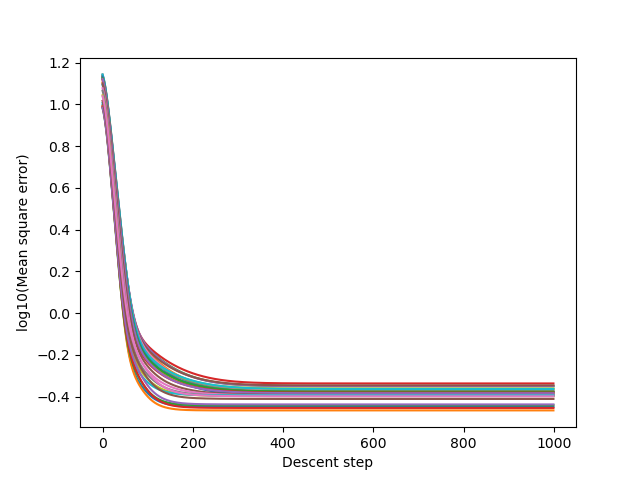

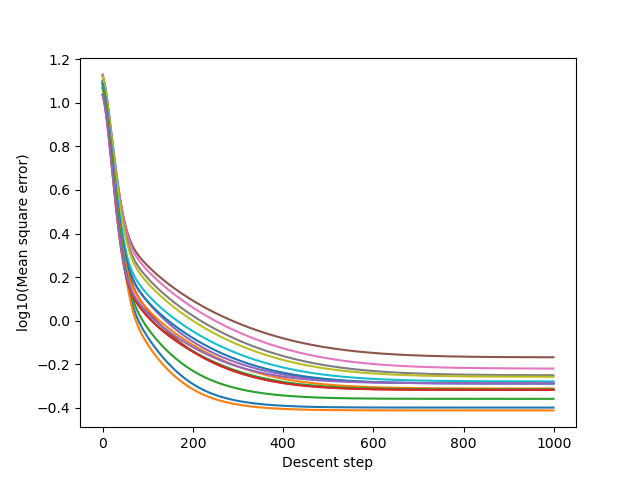

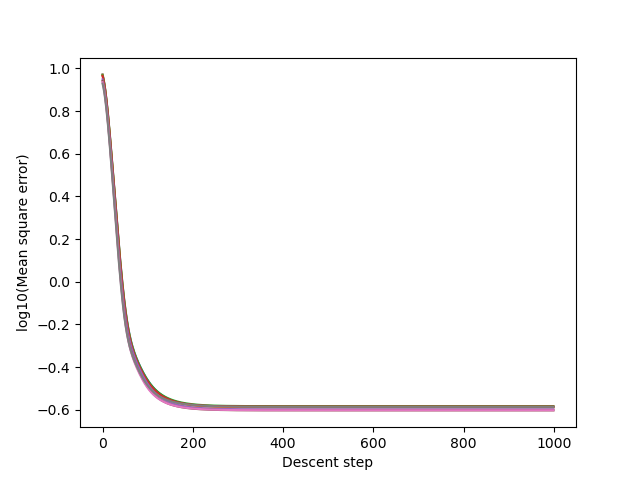

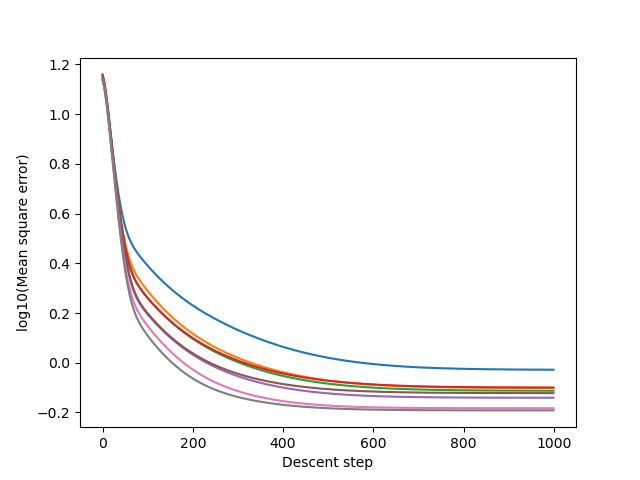

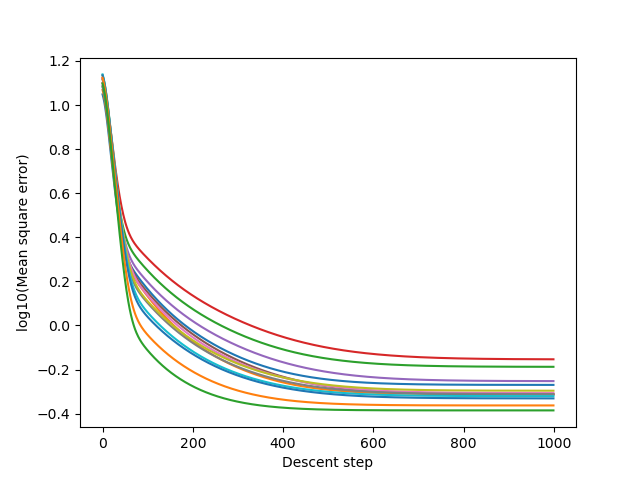

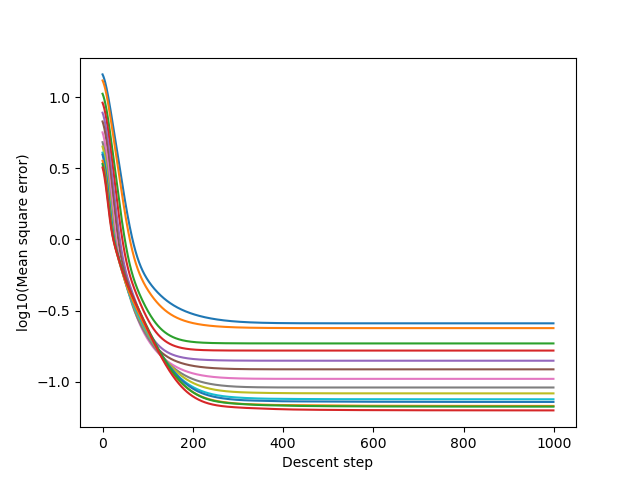

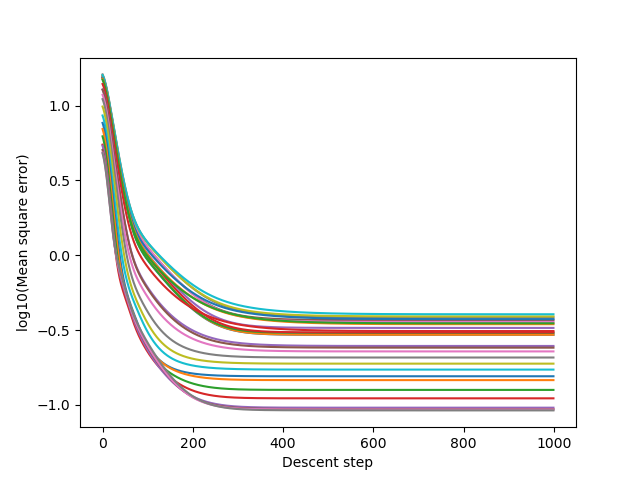

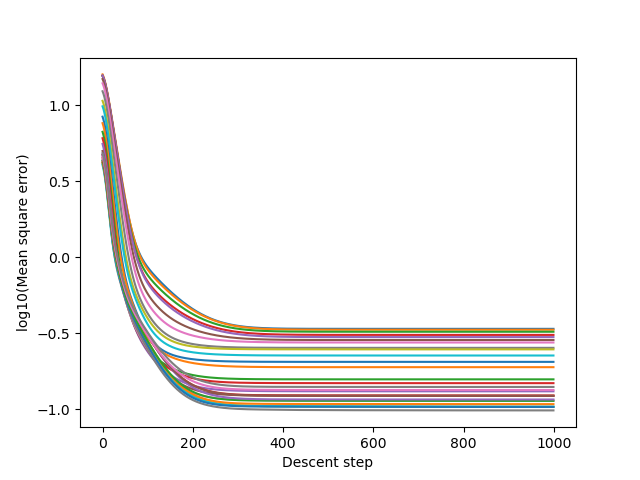

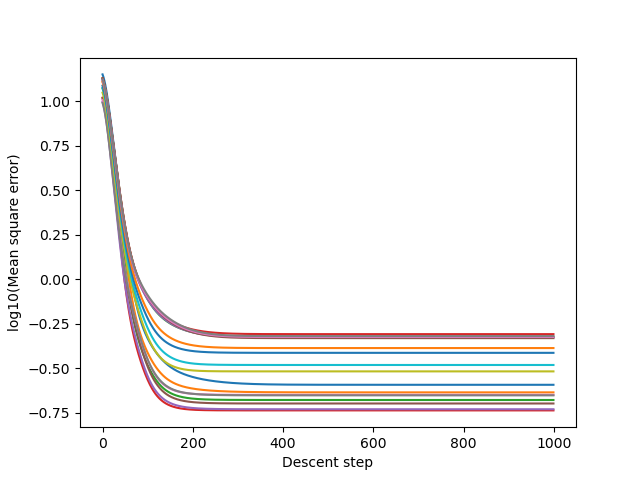

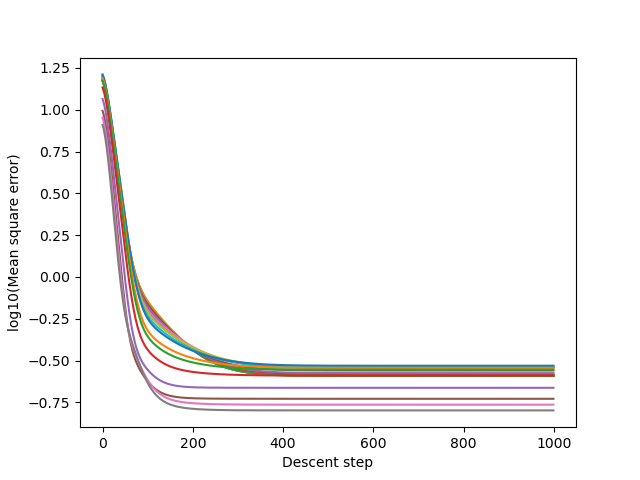

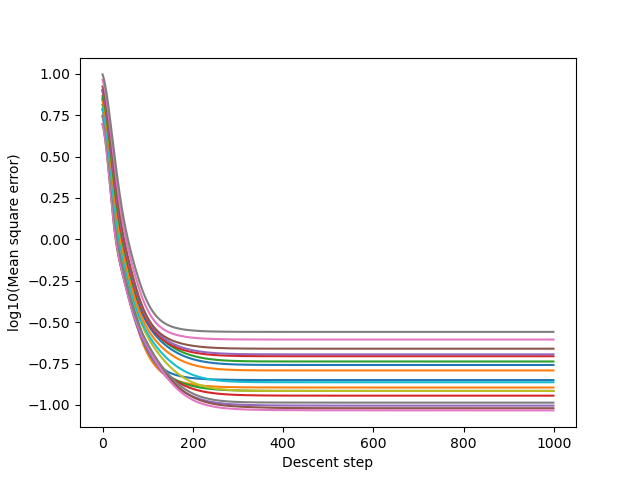

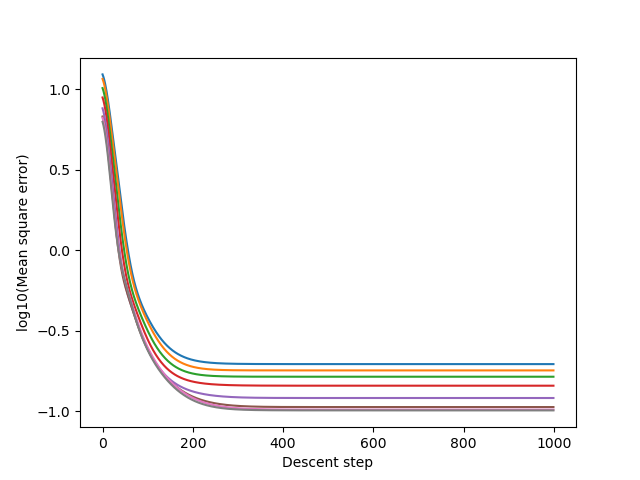

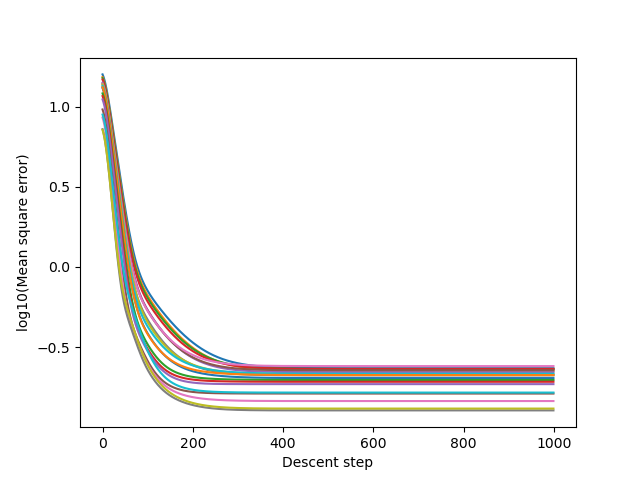

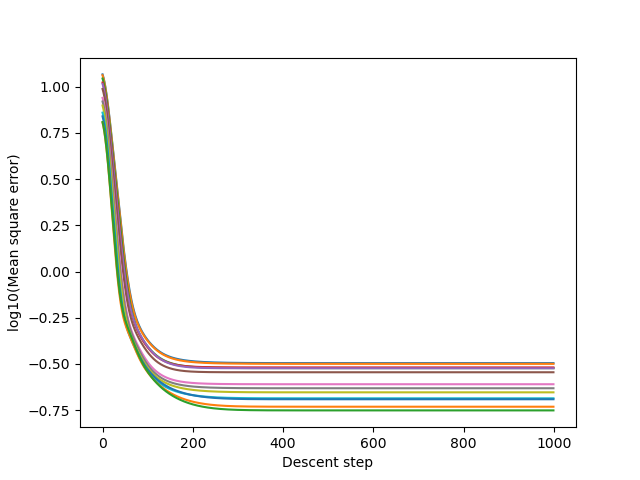

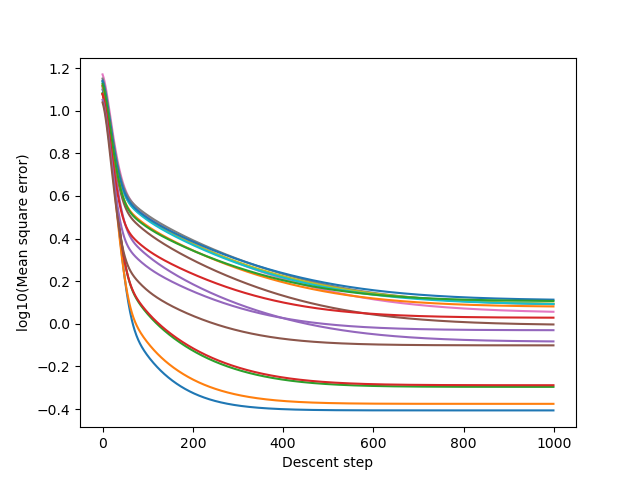

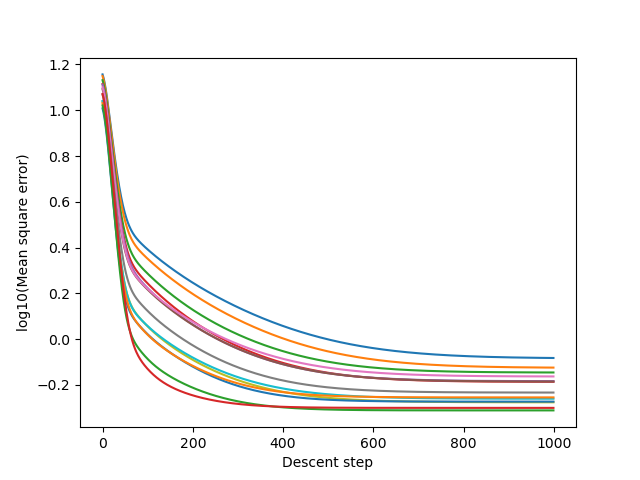

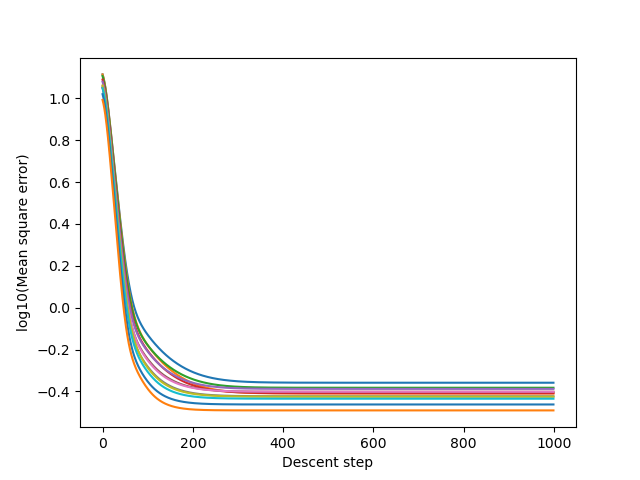

In [6]:
df = pd.read_csv('../../data/mlc4_embryos.csv')
df['Path'] = df['Path'].apply(lambda x: raw_data_path + x)
results = []
for index, row in df.iterrows():
    # print(row.Path)
    # print(row.EmbryoID)
    
    # Import movie
    img = load_image(row.Path + '/af_corrected.tif')
    roi = [np.loadtxt(row.Path + '/ROI_fit_%s.txt' % i) for i in range(img.shape[0])]
    
    # Run quantification
    iq = ImageQuant2(img=img, roi=roi, cytbg=cytbg, membg=membg)
    iq.quantify(descent_steps=1000)
    iq.plot_losses(log=True)
    
    # Compile results
    res = iq.compile_res(extra_columns={'Frame': np.arange(iq.nimgs)})
    res['EmbryoID'] = row.EmbryoID
    res['Membrane signal'] *= calibration_factor
    res = res.astype({'Frame': int})
    results.append(res)

### Combine dataframes

In [7]:
results_full = pd.concat(results)
results_full.to_csv('../../data/mlc4_quantification.csv')

### Filter out polar body

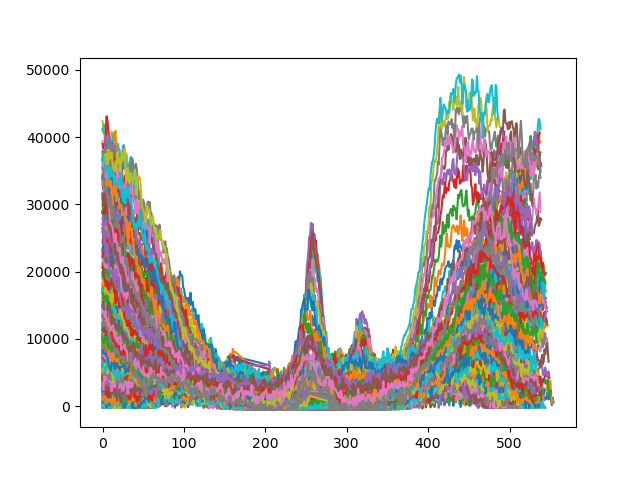

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

fig, ax = plt.subplots()
results_full = pd.read_csv('../../data/mlc4_quantification.csv')
res_grouped = results_full.groupby(['EmbryoID', 'Frame'])
for i, (g, r) in enumerate(res_grouped):
    path = df[df.EmbryoID == g[0]]['Path'].values[0]
    roi = np.loadtxt(path + '/ROI_fit_%s.txt' % g[1])
    _mems = r['Membrane signal']
    mems = _mems.to_numpy()
    if os.path.exists(path + '/polar_body.txt'):
        polar_body = np.loadtxt(path + '/polar_body.txt')
        ind = int(mems.shape[0] * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0])
        mems[ind-20:ind+20] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])  
    ax.plot(mems)
    results_full.loc[_mems.index, 'Membrane signal'] = mems
results_full.to_csv('../../data/mlc4_quantification_no_pb.csv')